# EXECUTIVE SUMMARY

1. Type of Problem: CLASSIFICATION PROBLEM

2. Optimum Machine Model Chosen: RANDOMFOREST CLASSIFIER

3. Accuracy Score: 84%

4. Cross Validation Score(CV): 84%

5. Differential Between Accuracy and CV Score: 0

6. Final Accuracy Score(After Hyperparamter Tunning): 84%

7. AUC Score: 91%

8. Key Operations executed: Exploratory Data Analysis(EDA), Data Preprocessing, Metrics Measurement, Model Execution and Hyperparameter Tunning

# PROJECT CONTENTS
- Problem Statement
- Domain Knowledge
- Step 1: Attributes of Variables
- Step 2: IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS
 - 2.1:Import all necessary libraries
 - 2.2:Load Dataset
 - 2.3:Data Descriptive Analysis
 - 2.4:Observations
- Step 3: EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
 - 3.1:Count Distribution of Categorical Data - Univariate Analysis
 - 3.2:Data Cleaning(Updating Unusual Elements)
 - 3.3:Encoding
 - 3.4:Normal Distribution Check(Univariate Analysis)
 - 3.5:Scatter Plot Check(Bivariate Analysis)
 - 3.6:Correlation Check
 - 3.7:Outlier Check(Univariate Analysis)
 - 3.8:Skewness Check(Univariate Analysis)
 - 3.9:Target Variable Check
- Step 4: DATA PREPROCESSING
 - 4.1:Removal of Duplicates
 - 4.2:Rechecking the current Relationship btw Variables
 - 4.3:Feature Selection(Dropping of Features that has no correlation with target variable and once that strongly promotes              multicollinearity(VIF))
 - 4.4:Removal of Outliers
 - 4.5:Transforming Data to Remove Skewness using Power transformation
 - 4.6:Seperating the datasets into X and Y variables
 - 4.7:Imbalancing of Target Variable
- Step 5: MODEL BUILDING
 - 5.1:Logistic Regression
 - 5.2:KNeighbors Classifier
 - 5.3:DecisionTree Classifier
 - 5.4:RandomForest Classifier
 - 5.5:AdaBoost Classifier
 - 5.6:GradientBoosting Classifier
 - 5.7:XGBoost Classifier
 - 5.8:ExtraTrees Classifier
 - 5.9:Support Vector Classifier(SVC)
 - 5.10:MLP Classifier
 - 5.11:GaussianNB Classifier
- Step 6:COMPARING ALL MACHINE LEARNING MODELS
 - 6.1:Comparing Differences between Accuracy and Cross_Validation Scores...
 - 6.2:Conclusion on Choice of Model
- Step 7:HYPERPARAMETER TUNNING
- Step 8:ROC AUC PLOT
- Step 9:MODEL SAVING

# PROBLEM STATEMENT(Census Income Project)



This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.



To download the dataset, use the link given below. 

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

# Domain Knowledge
Before we proceed, its expedient to brainstorm and come up with as many hypothesis as possible about what could affect the dependent variable. It facilitates in exploring the data at hand more efficiently and effectively. Domain Knowledge should be done before seeing the data or else we will end up with biased hypotheses. Below are some anticipated assertions on the problem statement. 

- Sexual orientation does not impact the income

- ethnocultural, education and labour characteristics impact income data

- Occupation plays an important role in determining income statistics

- Employment influences income of a population

# Step 1 - ATTRIBUTES OF VARIABLES

Lets understand the meaning and characteristics of our variables

Independent Variables

1. Age - the length of time an employee has lived or a thing has existed.


2. Workclass - This refers to persons that are employed or self-employed


3. Fnlwgt - the prescribed amount of pay for a given job of work paid for by the day or hour.


4. Education - This refers to the level of education attained either from University or Institution


5. Education_num - This refers to the number of years spent learning in a University or Institution


6. Marital_status - This refers to a person's state of being single, married, separated, divorced, or widowed


7. Occupation - This referes to the person's job or profession


8. Relationship - This referes to the way in which two or more people are connected


9. Race - This refers to a category of persons who share certain inherited physical characteristics, such as skin color, facial           features, and stature


10. Sex - This refers to two main categories (male and female) into which persons are divided on the basis of their reproductive           function


11. Capital_gain - This refers to 


12. Capital_loss - This refers to 


13. Hours_per_week - This refers to is the exact number of hours person has worked weekly


14. Native_country - This refers to country or area where person was born and brought up



Dependent Variables


15. Income - This refers to money received, especially on a regular basis, for work or through investments

# Step 2 - IMPORT ALL NECESSARY LIBRARIES, LOAD DATA SET, DATA DESCRIPTIVE ANALYSIS AND OBSERVATIONS

# 2.1 - Import all necessary libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, RandomizedSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report, plot_roc_curve
from scipy.stats import zscore
from sklearn.preprocessing import power_transform, PowerTransformer
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

import warnings
warnings.filterwarnings('ignore')

# 2.2 - Load Dataset

In [2]:
#Load dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

In [3]:
#checking the first five rows
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [4]:
#checking the last five rows
df.tail()

Age      Workclass  Fnlwgt    Education  Education_num  \
32555   27        Private  257302   Assoc-acdm             12   
32556   40        Private  154374      HS-grad              9   
32557   58        Private  151910      HS-grad              9   
32558   22        Private  201490      HS-grad              9   
32559   52   Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation Relationship    Race      Sex  \
32555   Married-civ-spouse        Tech-support         Wife   White   Female   
32556   Married-civ-spouse   Machine-op-inspct      Husband   White     Male   
32557              Widowed        Adm-clerical    Unmarried   White   Female   
32558        Never-married        Adm-clerical    Own-child   White     Male   
32559   Married-civ-spouse     Exec-managerial         Wife   White   Female   

       Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
32555             0             0              38   United-States   <=50K  
32556             0             0              40   United-States    >50K  
32557             0             0              40   United-States   <=50K  
32558             0             0              20   United-States   <=50K  
32559         15024             0              40   United-States    >50K

In [5]:
#picking 4 random samples
df.sample(4)

Age Workclass  Fnlwgt      Education  Education_num  \
17256   28   Private  181916   Some-college             10   
9888    22   Private  219086   Some-college             10   
13463   45   Private  162915   Some-college             10   
1922    21         ?  124242   Some-college             10   

            Marital_status          Occupation    Relationship    Race  \
17256            Separated   Machine-op-inspct   Not-in-family   White   
9888    Married-civ-spouse               Sales         Husband   White   
13463             Divorced    Transport-moving   Not-in-family   White   
1922         Never-married                   ?       Own-child   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
17256     Male             0             0              40   United-States   
9888      Male             0             0              55   United-States   
13463     Male             0             0              50   United-States   
1922    Female             0             0              40   United-States   

       Income  
17256   <=50K  
9888    <=50K  
13463   <=50K  
1922    <=50K

# 2.3 - Data Descriptive Analysis

In [6]:
#checking the data shape
df.shape

(32560, 15)

In [7]:
#checking for nature of datatypes
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In [8]:
#Checking data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
#Checking data full description
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

- Just incase you were wondering, notice the Object data are not contained in the data.describe analysis!

- Looking at the above table we can see an anomaly between the mean and standard deviation on all numerical data above.

In [10]:
#Checking data description for all non-numerical columns
dtypes = ['int8','int16','int32','int64','float16','float32','float64']#enlisiting and storing possible data types of continuous data. This means any continuous data MUST have any of this type of data type
cat_columns=[]#initializing an emty list
Features = df.columns.values.tolist()#Pulling all the features(columns) of the dataset and storing in features
for i in Features:#col is the iterating variable
    if df[i].dtype in dtypes:
        continue
    cat_columns.append(i)
df[cat_columns].describe()

Workclass Education       Marital_status       Occupation Relationship  \
count      32560     32560                32560            32560        32560   
unique         9        16                    7               15            6   
top      Private   HS-grad   Married-civ-spouse   Prof-specialty      Husband   
freq       22696     10501                14976             4140        13193   

          Race    Sex  Native_country  Income  
count    32560  32560           32560   32560  
unique       5      2              42       2  
top      White   Male   United-States   <=50K  
freq     27815  21789           29169   24719

In [11]:
#lets check the columns/headers and see its orientation
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [12]:
#Checking for null values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Hmmm....the above shows there are no null values! meaning we wont be adopting the process of using 'fillna' or simpler imputer!

In [13]:
#Checking for null values
df.isnull().sum().sum()

0

In [14]:
#Checking the factors of each columns using a for loop for ease
for i in df.columns:
    print("\nThe Value Counts in", i, Counter(df[i]))


The Value Counts in Age Counter({36: 898, 31: 888, 34: 886, 23: 877, 35: 876, 33: 875, 28: 867, 30: 861, 37: 858, 25: 841, 27: 835, 32: 828, 38: 827, 39: 815, 29: 813, 41: 808, 24: 798, 40: 794, 26: 785, 42: 780, 43: 770, 22: 765, 20: 753, 46: 737, 45: 734, 44: 724, 21: 720, 19: 712, 47: 708, 50: 602, 51: 595, 49: 577, 18: 550, 48: 543, 52: 478, 53: 464, 55: 419, 54: 415, 17: 395, 56: 366, 58: 366, 57: 358, 59: 355, 60: 312, 61: 300, 62: 258, 63: 230, 64: 208, 65: 178, 67: 151, 66: 150, 68: 120, 69: 108, 70: 89, 71: 72, 72: 67, 73: 64, 74: 51, 76: 46, 75: 45, 90: 43, 77: 29, 78: 23, 79: 22, 80: 22, 81: 20, 82: 12, 84: 10, 83: 6, 88: 3, 85: 3, 86: 1, 87: 1})

The Value Counts in Workclass Counter({' Private': 22696, ' Self-emp-not-inc': 2541, ' Local-gov': 2093, ' ?': 1836, ' State-gov': 1297, ' Self-emp-inc': 1116, ' Federal-gov': 960, ' Without-pay': 14, ' Never-worked': 7})

The Value Counts in Fnlwgt Counter({123011: 13, 164190: 13, 203488: 13, 148995: 12, 121124: 12, 126675: 12, 1

In [15]:
#Checking the count-goemetry of the Target column only
print("The Value Counts in Income - ",Counter(df['Income']))

The Value Counts in Income -  Counter({' <=50K': 24719, ' >50K': 7841})


Hmmmmm....this looks like an imbalanced data! lets take note of this as we shall revisit such assymetrial distribution of data where we shall deploy the services of SMOTE(Synthetic Minority Oversampling Technique) to balance data!

In [16]:
for variable in df.columns:
    print('\n',df[variable].value_counts())


 36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 164190    13
203488    13
123011    13
148995    12
126675    12
          ..
325573     1
140176     1
318264     1
329205     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dty

Lets check crirtically the factors of the object data which has been stored in 'cat_columns'

In [17]:
cat_columns

['Workclass',
 'Education',
 'Marital_status',
 'Occupation',
 'Relationship',
 'Race',
 'Sex',
 'Native_country',
 'Income']

Lets take them one by one....

In [18]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Notice the unsual element - '?' which occurred 1836 times in the Workclass data

In [19]:
df['Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

The above is fine, no unusual element

In [20]:
df['Marital_status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

The above is fine, no unusual element

In [21]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

Notice the unsual element - '?' which occurred 1843 times in the Occupation data

In [22]:
df['Relationship'].value_counts()

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64

The above is fine, no unusual element

In [23]:
df['Race'].value_counts()

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64

The above is fine, no unusual element

In [24]:
df['Sex'].value_counts()

 Male      21789
 Female    10771
Name: Sex, dtype: int64

The above is fine, no unusual element

In [25]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

Notice the unsual element - '?' which occurred 583 times in the Native_country data

In [26]:
df['Income'].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

The above is fine, no unusual element

# 2.4 - Observations


# The Dataset is made up of;
- 32560 rows and 15 columns
- 14 features and 1 Target

# Description of Features:


1. Age:
- It has no null values
- Its Datatype is interger type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis takes place



2. Workclass:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 8 factors
- It has an unsual factor - '?' which occurred 1836 times
- Its non-numerical data and hence need encoding before Exploratory Data Analysis takes place


3. Fnlwgt:
- It has no null values
- Its Datatype is integer type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis takes place


4. Education:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 16 factors
- Its non-numerical data and hence need encoding before Exploratory Data Analysis takes place

5. Education_num:
- It has no null values
- Its Datatype is integer type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis takes place

6. Marital_status:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 7 factors
- Its non-numerical data and hence need encoding before Exploratory Data Analysis takes place

7. Occupation:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 15 factors
- It has an unsual factor - '?' which occurred 1843 times
- Its non-numerical data and hence need encoding before Exploratory Data Analysis takes place

8. Relationship:
- It has no null values
- Its Datatype is Object type
- It has 6 factors
- It is made up of Categorical data
- Its non-numerical data and hence need encoding before Exploratory Data Analysis takes place

9. Race:
- It has no null values
- Its Datatype is Object type
- It has 5 factors
- It is made up of Categorical data
- Its non-numerical data and hence need encoding before Exploratory Data Analysis takes place


10. Sex:
- It has no null values
- Its Datatype is Object type
- It has 2 factors
- It is made up of Categorical data
- Its non-numerical data and hence need encoding before Exploratory Data Analysis takes place

11. Capital_gain:
- It has no null values
- Its Datatype is integer type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis takes place


12. Capital_loss:
- It has no null values
- Its Datatype is integer type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis takes place

13. Hours_per_week:
- It has no null values
- Its Datatype is integer type
- It is made up of Continuos data
- Its has numerical data and hence DOES NOT need encoding before Exploratory Data Analysis takes place


14. Native_country:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 42 factors
- It has an unsual factor - '?' which occurred 583 times
- Its non-numerical data and hence need encoding before Exploratory Data Analysis takes place



# About the Target/Label:

13. Income: This is the target variable and has the following properties:
- It has no null values
- Its Datatype is Object type
- It is made up of Categorical data
- It has 2 factors
- Its non-numerical data and hence need encoding before Exploratory Data Analysis takes place


**Since the target is made up of a categorical data hence this is a CLASSIFICATION PROBLEM! lets move on

# Step 3 - EXPLORATORY DATA ANALYSIS(EDA) AND VISUALIZATION
The objectives of the EDA is to ensure;
1. Independent Features will have a normal distribution using Data Transformation to remove skewness
2. Datasets will have the same scale using Normalization and Standardization
3. Column mean will be zero
4. Standard Deviation of the data should be 1

# 3.1 Count Distribution of Categorical Data - Univariate Analysis

In [27]:
#Lets cull-out the categorical data in a seperate object called features using for loop and if statement
dtypes=['int64','float64']
col_obj=[]
for i in df.columns:
    if df[i].dtypes in dtypes:
        continue
    col_obj.append(i)
features=df[col_obj]
features

Workclass    Education       Marital_status  \
0       Self-emp-not-inc    Bachelors   Married-civ-spouse   
1                Private      HS-grad             Divorced   
2                Private         11th   Married-civ-spouse   
3                Private    Bachelors   Married-civ-spouse   
4                Private      Masters   Married-civ-spouse   
...                  ...          ...                  ...   
32555            Private   Assoc-acdm   Married-civ-spouse   
32556            Private      HS-grad   Married-civ-spouse   
32557            Private      HS-grad              Widowed   
32558            Private      HS-grad        Never-married   
32559       Self-emp-inc      HS-grad   Married-civ-spouse   

               Occupation    Relationship    Race      Sex  Native_country  \
0         Exec-managerial         Husband   White     Male   United-States   
1       Handlers-cleaners   Not-in-family   White     Male   United-States   
2       Handlers-cleaners         Husband   Black     Male   United-States   
3          Prof-specialty            Wife   Black   Female            Cuba   
4         Exec-managerial            Wife   White   Female   United-States   
...                   ...             ...     ...      ...             ...   
32555        Tech-support            Wife   White   Female   United-States   
32556   Machine-op-inspct         Husband   White     Male   United-States   
32557        Adm-clerical       Unmarried   White   Female   United-States   
32558        Adm-clerical       Own-child   White     Male   United-States   
32559     Exec-managerial            Wife   White   Female   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 9 columns]


  Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

  HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

  Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64

  Prof-specialty       4140
 Craft-repair         4099
 Exec-ma

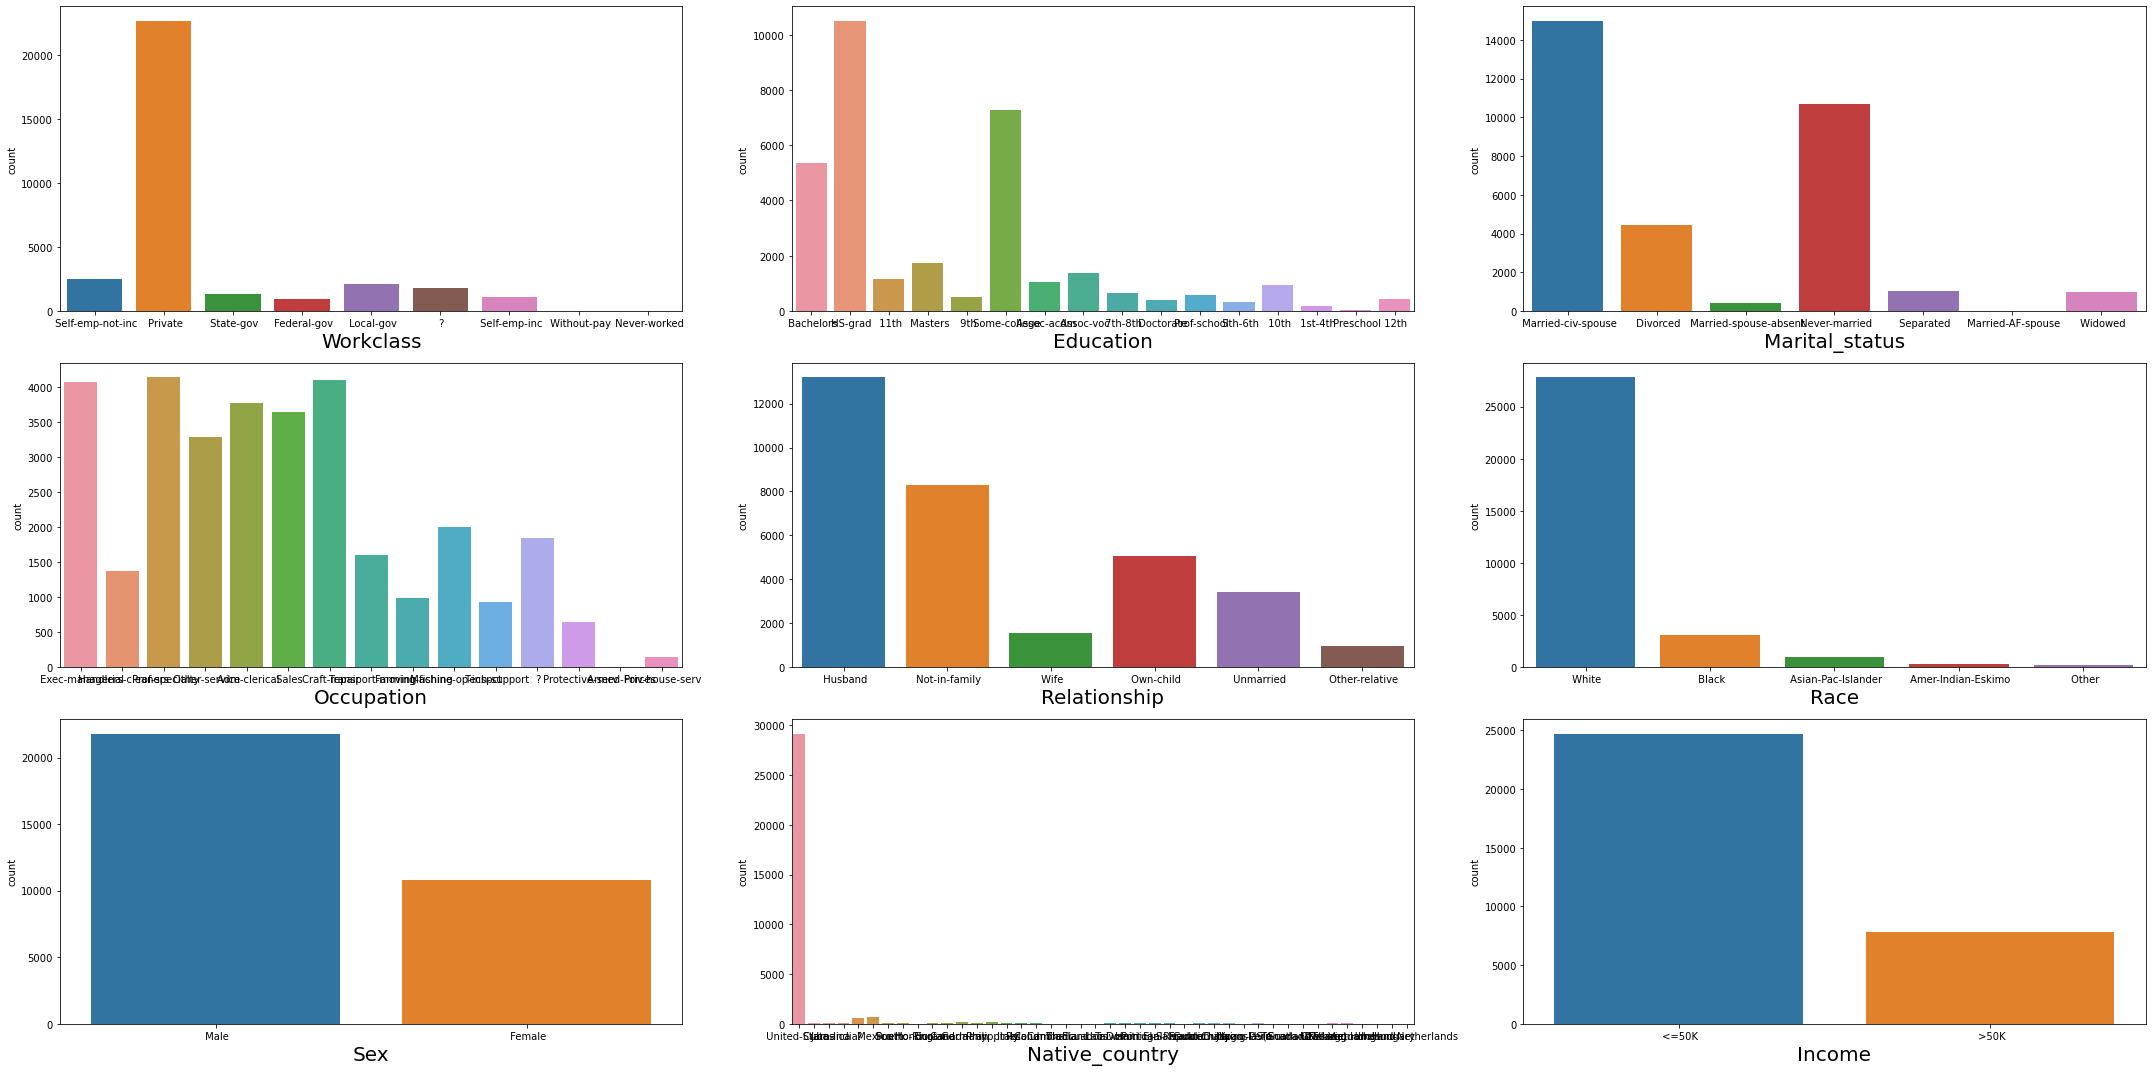

In [28]:
#Check for count distribution and see how data is distributed for every column that has an object data type
plt.figure(figsize=(30,15))#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in features:#triggering your for loop
    if plotnumber<=9:#since there are 6 features
        ax = plt.subplot(3,3,plotnumber)#3,3 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.countplot(features[column])#performing a distribution plot for all the columns starting with
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 9
    print('\n',features[column].value_counts())
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations Univariate Analysis on Categorical Data 
From the above count plots we can see:

- Majority of the persons work in private organization

- About 1836 person has unidentified Workcclass in the data set

- Majority of the persons are High School graduate as their highest level of education

- Majority of the persons are married and have civilians as their spouse

- Majority of persons are Professors

- About 1843 persons have an unidentified Occupation Status in the data set

- Majority of persons have thier husbands

- Majority of persons are white

- Majority of the persons are Males

- Majority of the persons are from the United States

- About 583 persons could not be traced to their Native_country

# 3.2 - Data Cleaning(Updating Unusual Elements)

In [29]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

Its clear we dont have any null data issues. So lets go ahead and take care of the unsual element - '?'

Now referring to observations from our Univariate Analysis on Categorical Data above we can see that the below features possess unusual element - '?':

- Workclass

- Occupation

- Native_country

Lets check the value_counts method again

In [30]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [31]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

In [32]:
df['Native_country'].value_counts()

 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [33]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

# Initial Observations and Assumptions on Data Cleaining(Updating Unusual Elements and Datatype Conversion)

- We can see only 3 features with unusual elements; Workclass, Occupation, Native_country ! 

- Looking at the data, to avoid unneccassary mismatch of these unsual element with wrong corresponding values, we will simply drop all unsusal elements across the 3 features in question. 
    
- No need for datatype conversion as all features are in appropriate datatype status

# Adopting Assumptions on dropping Unusual Elements

Firstly, Lets have a duplicate copy of our dataset at this point for future reference....

In [34]:
df_1=df.copy()
df_1

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

Next is to remove the unusual elements in Workclass columns....

In [35]:
index_Workclass=np.where(df['Workclass'] == ' ?')
df=df.drop(df.index[index_Workclass])
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[30724 rows x 15 columns]

We can see that the rows have been reduced by 1836, meaning the unusual elements have been removed. Lets go ahead and proove that

In [36]:
df['Workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Confirmed!

Next is to remove the unusual elements in 'Occupation' columns....

In [37]:
index_Occupation=np.where(df['Occupation'] == ' ?')
df=df.drop(df.index[index_Occupation])
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[30717 rows x 15 columns]

In [38]:
df['Occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64

We can see that the unusual elements have been removed.

Next is to remove the unusual elements in Native_country columns....

In [39]:
index_Native_country=np.where(df['Native_country'] == ' ?')
df=df.drop(df.index[index_Native_country])
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[30161 rows x 15 columns]

In [40]:
df['Native_country'].value_counts()

 United-States                 27503
 Mexico                          610
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 India                           100
 El-Salvador                     100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 China                            68
 Italy                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Iran                             42
 Taiwan                           42
 Haiti                            42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 Greece                           29
 

We can see that the unusual elements have been removed!

# Final Observations on Data Cleaining(Updating Unusual Elements and Datatype Conversion)

- All unusual elements('?') have been wipped-out 

    
- No datatype conversion was executed since all features are in their appropriate datatype status

# 3.3 - Encoding
- We are fully aware we cannot run an exhaustive EDA on non-numerical data
- This makes it necessary for us to covert all non-numerical data into numerical ones
- To this end, We Shall use Label encoding on all the 9 object columns which has been stored in the 'features' object

In [41]:
#Initializing.....
enc=LabelEncoder()

Now lets write a simple program using our python skills to encode all non-numerical data at once!

In [42]:
#Using the for loop to iterate over the 8 object-columns to produce an encoded version.....
for i in features:
    df[i] = enc.fit_transform(df[i])
df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          4   83311          9             13               2   
1       38          2  215646         11              9               0   
2       53          2  234721          1              7               2   
3       28          2  338409          9             13               2   
4       37          2  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          2  257302          7             12               2   
32556   40          2  154374         11              9               2   
32557   58          2  151910         11              9               6   
32558   22          2  201490         11              9               4   
32559   52          3  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
3               9             5     2    0             0             0   
4               3             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
3                  40               4       0  
4                  40              38       0  
...               ...             ...     ...  
32555              38              38       0  
32556              40              38       1  
32557              40              38       0  
32558              20              38       0  
32559              40              38       1  

[30161 rows x 15 columns]

Note that from the above, the Target data <=50K and >50K was encoded to 0 and 1 reespectively

Now, having encoded data, lets check if data types of the 9 object-columns has been changed to intergers....

In [43]:
#recheking Checking for types..
df.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Sex               int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Fantastic!

# Observations on Encoding 
From the above we can see that;
- All non-numerical(Object) columns have been converted to numerical data(Integer)! Lets move on!

# 3.4 - Normal Distribution Check(Univariate Analysis)

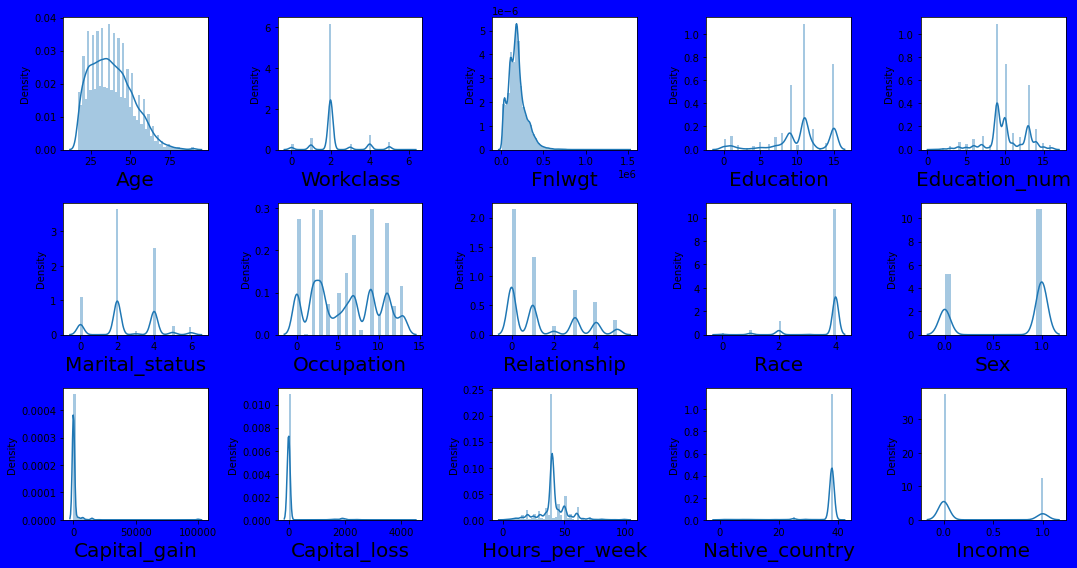

In [44]:
#Check for normal distribution and see how data is distributed for every column
plt.figure(figsize=(15,8), facecolor='blue')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in df:#triggering your for loop
    if plotnumber<=15:#since there are 15 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Normal Distribution Check
From the above density plot we can see that majority of features does not obey a normal distribution, the building blocks are not in tandem with a normalized curve:



***The normal distribution of the 'income' has no contribution to our Model Building

# 3.5 - Scatter Plot Check(Bivariate Analysis)
- Lets visualize the relationship between the features and the Label

In [45]:
#extracting only the features(wihtout the Label) from the original dataset and store in Features
Features=df.drop('Income',axis=1)
Features

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          4   83311          9             13               2   
1       38          2  215646         11              9               0   
2       53          2  234721          1              7               2   
3       28          2  338409          9             13               2   
4       37          2  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          2  257302          7             12               2   
32556   40          2  154374         11              9               2   
32557   58          2  151910         11              9               6   
32558   22          2  201490         11              9               4   
32559   52          3  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               3             0     4    1             0             0   
1               5             1     4    1             0             0   
2               5             0     2    1             0             0   
3               9             5     2    0             0             0   
4               3             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          12             5     4    0             0             0   
32556           6             0     4    1             0             0   
32557           0             4     4    0             0             0   
32558           0             3     4    1             0             0   
32559           3             5     4    0         15024             0   

       Hours_per_week  Native_country  
0                  13              38  
1                  40              38  
2                  40              38  
3                  40               4  
4                  40              38  
...               ...             ...  
32555              38              38  
32556              40              38  
32557              40              38  
32558              20              38  
32559              40              38  

[30161 rows x 14 columns]

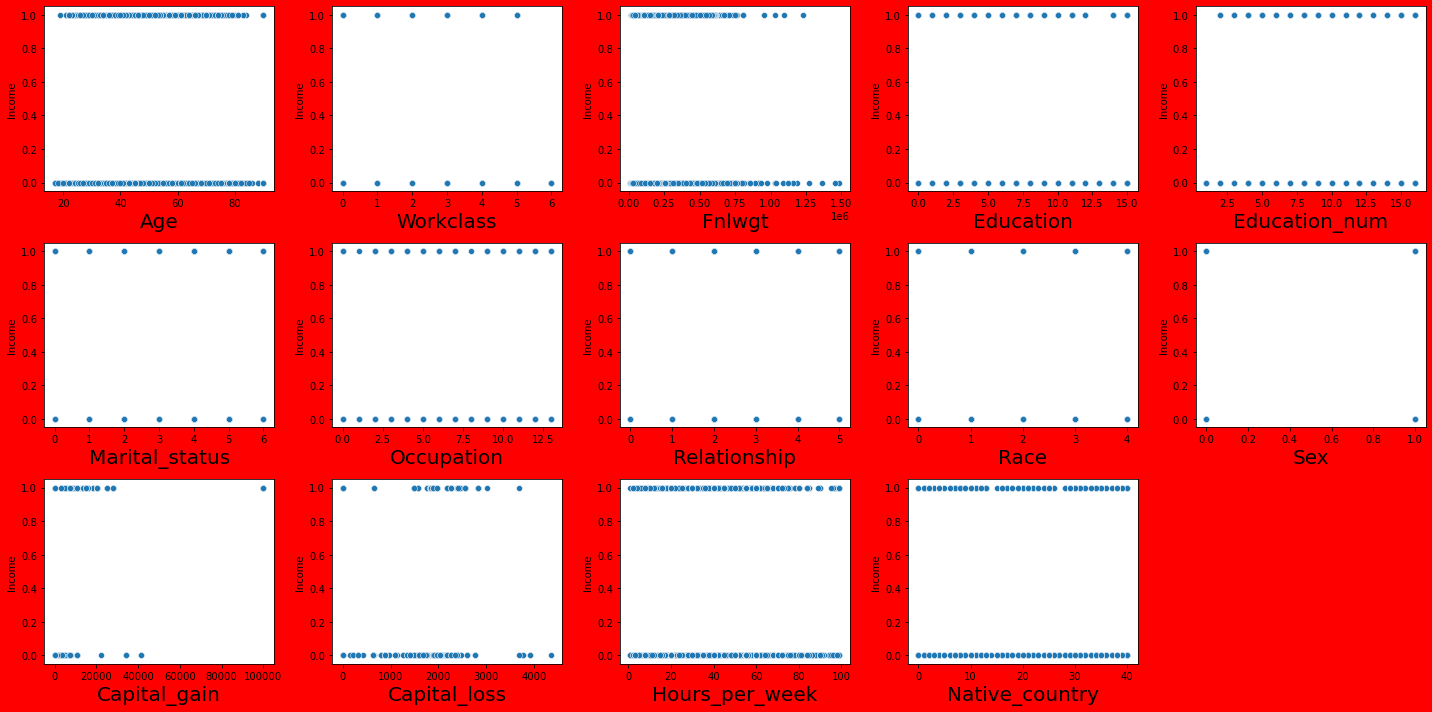

In [46]:
#Check for the relatinship between each features and Target
plt.figure(figsize=(20,10), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in Features:#triggering your for loop
    if plotnumber<=15:#since there are 8 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.scatterplot(x=Features[column],y=df['Income'])#performing a relationship plot between features and label
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 50
        plt.ylabel('Income',fontsize=10)#labelling the y-axis with a font size of 50
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 34
plt.tight_layout()#This is just to show you data in a compact form. 

# Observations on Scatter Plot
From the above scatter plot we can see a strong relationship between the features and the Label(income)! Wow thats great! ...making our feature selection process less difficult as long as multicolinearity does not exist!

# 3.6 - Correlation Check;
 - Collinearity Between Feature and Label
 - Multicolinearity between features

Lets see/visualize the correlation between (Features vs Label) and (Features vs Features)

In [47]:
#checking for general correlation
df.corr()

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.080548 -0.076511  -0.001111       0.043525   
Workclass       0.080548   1.000000 -0.032395   0.017892       0.037729   
Fnlwgt         -0.076511  -0.032395  1.000000  -0.027115      -0.044954   
Education      -0.001111   0.017892 -0.027115   1.000000       0.345431   
Education_num   0.043525   0.037729 -0.044954   0.345431       1.000000   
Marital_status -0.276378  -0.034338  0.032197  -0.040654      -0.063457   
Occupation     -0.005680   0.015719  0.000152  -0.038231       0.087778   
Relationship   -0.246456  -0.067401  0.009289  -0.012720      -0.091928   
Race            0.023373   0.044700 -0.023882   0.011158       0.032791   
Sex             0.081992   0.074917  0.025387  -0.027880       0.006131   
Capital_gain    0.080154   0.035340  0.000427   0.030577       0.124413   
Capital_loss    0.060166   0.007226 -0.009757   0.015025       0.079656   
Hours_per_week  0.101599   0.050738 -0.022889   0.059887       0.152528   
Native_country -0.001905   0.007644 -0.066709   0.078794       0.091547   
Income          0.242000   0.018103 -0.008978   0.078981       0.335317   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.276378   -0.005680     -0.246456  0.023373  0.081992   
Workclass            -0.034338    0.015719     -0.067401  0.044700  0.074917   
Fnlwgt                0.032197    0.000152      0.009289 -0.023882  0.025387   
Education            -0.040654   -0.038231     -0.012720  0.011158 -0.027880   
Education_num        -0.063457    0.087778     -0.091928  0.032791  0.006131   
Marital_status        1.000000    0.022702      0.177975 -0.068641 -0.119837   
Occupation            0.022702    1.000000     -0.053742  0.000736  0.062350   
Relationship          0.177975   -0.053742      1.000000 -0.117140 -0.584876   
Race                 -0.068641    0.000736     -0.117140  1.000000  0.089178   
Sex                  -0.119837    0.062350     -0.584876  0.089178  1.000000   
Capital_gain         -0.042424    0.022170     -0.058258  0.014351  0.048811   
Capital_loss         -0.035197    0.014597     -0.063569  0.023520  0.047017   
Hours_per_week       -0.189004    0.018362     -0.257851  0.048533  0.231272   
Native_country       -0.025911   -0.003470     -0.010806  0.124511  0.000612   
Income               -0.193504    0.051551     -0.251009  0.071666  0.216715   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.080154      0.060166        0.101599       -0.001905   
Workclass           0.035340      0.007226        0.050738        0.007644   
Fnlwgt              0.000427     -0.009757       -0.022889       -0.066709   
Education           0.030577      0.015025        0.059887        0.078794   
Education_num       0.124413      0.079656        0.152528        0.091547   
Marital_status     -0.042424     -0.035197       -0.189004       -0.025911   
Occupation          0.022170      0.014597        0.018362       -0.003470   
Relationship       -0.058258     -0.063569       -0.257851       -0.010806   
Race                0.014351      0.023520        0.048533        0.124511   
Sex                 0.048811      0.047017        0.231272        0.000612   
Capital_gain        1.000000     -0.032228        0.080432        0.008529   
Capital_loss       -0.032228      1.000000        0.052417        0.009388   
Hours_per_week      0.080432      0.052417        1.000000        0.008408   
Native_country      0.008529      0.009388        0.008408        1.000000   
Income              0.221200      0.150050        0.229480        0.023273   

                  Income  
Age             0.242000  
Workclass       0.018103  
Fnlwgt         -0.008978  
Education       0.078981  
Education_num   0.335317  
Marital_status -0.193504  
Occupation      0.051551  
Relationship   -0.251009  
Race            0.071666  
Sex             0.21

In [48]:
#checking for correlation between each feature and Label
df.corr()['Income'].sort_values()

Relationship     -0.251009
Marital_status   -0.193504
Fnlwgt           -0.008978
Workclass         0.018103
Native_country    0.023273
Occupation        0.051551
Race              0.071666
Education         0.078981
Capital_loss      0.150050
Sex               0.216715
Capital_gain      0.221200
Hours_per_week    0.229480
Age               0.242000
Education_num     0.335317
Income            1.000000
Name: Income, dtype: float64

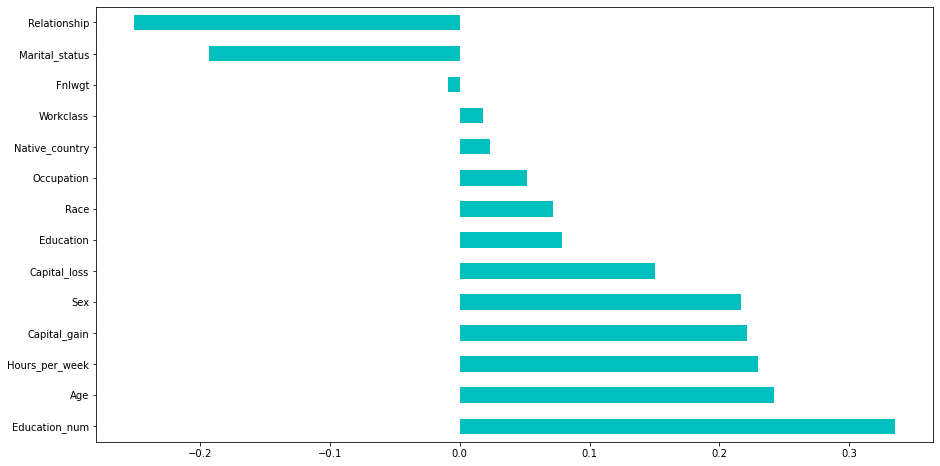

In [49]:
#Plotting a barh chart to visualize correlation through the stand-alone bars
plt.figure(figsize=(15,8))
df.corr()['Income'].sort_values(ascending=False).drop(['Income']).plot(kind='barh', color='c')
plt.show()

# Multicollinearity Check

<AxesSubplot:>

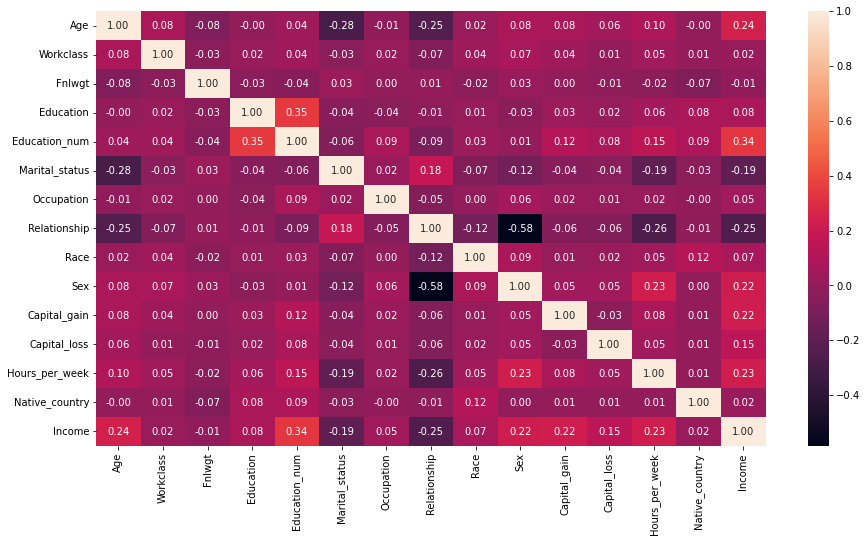

In [50]:
#Plotting a heatmap to show correlation through the brightness of the map-squares
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

<function matplotlib.pyplot.show(close=None, block=None)>

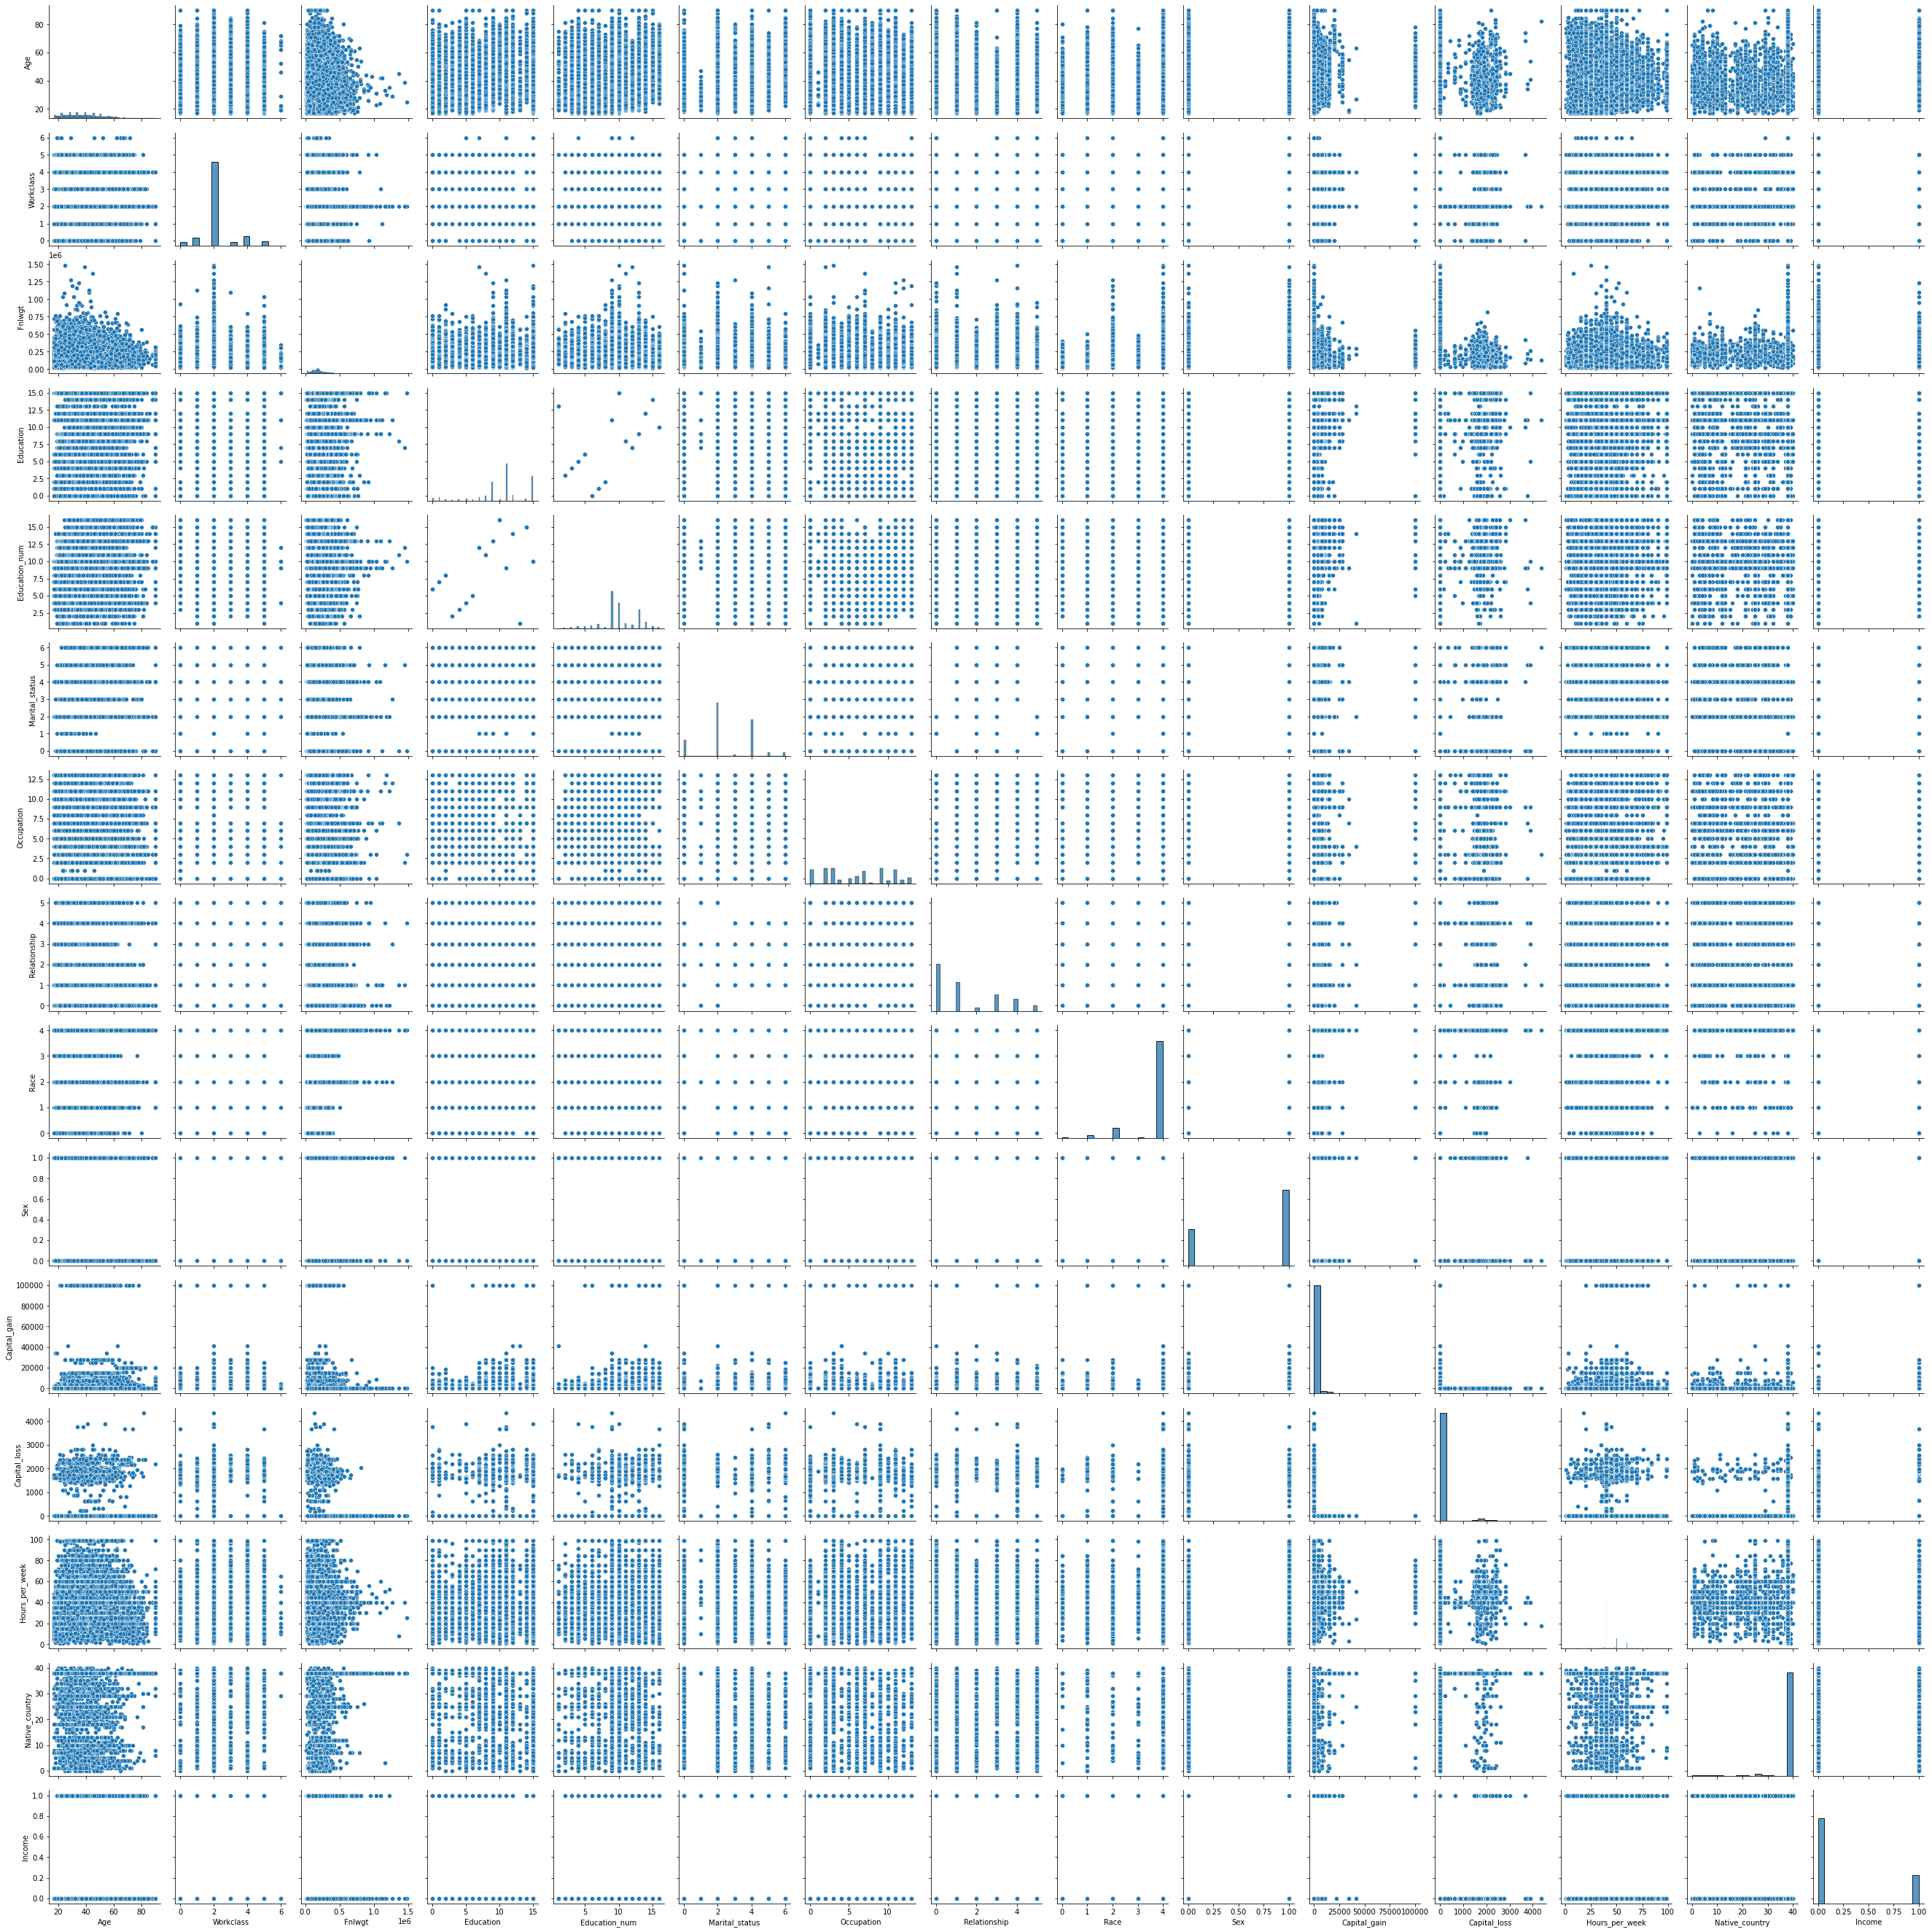

In [51]:
#lets also consumate further our quest for Multicollinearity check by ploting a pair plot
sns.pairplot(df)
plt.show

In [52]:
df.corr()['Income'].sort_values()

Relationship     -0.251009
Marital_status   -0.193504
Fnlwgt           -0.008978
Workclass         0.018103
Native_country    0.023273
Occupation        0.051551
Race              0.071666
Education         0.078981
Capital_loss      0.150050
Sex               0.216715
Capital_gain      0.221200
Hours_per_week    0.229480
Age               0.242000
Education_num     0.335317
Income            1.000000
Name: Income, dtype: float64

# Observations on Correlation
From the above correlation statistics;

Collinearity:


Relationship     -0.251009
Marital_status   -0.193504
Fnlwgt           -0.008978
Workclass         0.018103
Native_country    0.023273
Occupation        0.051551
Race              0.071666
Education         0.078981
Capital_loss      0.150050
Sex               0.216715
Capital_gain      0.221200
Hours_per_week    0.229480
Age               0.242000
Education_num     0.335317
Income            1.000000


- Relationship has a negative correlation of 25% with the target column which can be considered as fair bond

- Marital_status has a negative correlation of 19% with the target column which can be considered as fair bond

- Fnlwgt has a negative correlation of 0.9% with the target column which can be considered as weak bond

- Workclass has a positive correlation of 2% with the target column which can be considered as weak bond  

- Native_country has a positive correlation of 2% with the target column which can be considered as weak bond       

- Occupation has a positive correlation of 5% with the target column which can be considered as weak bond  

- Race has a positive correlation of 7% with the target column which can be considered as weak bond 

- Education has a positive correlation of 8% with the target column which can be considered as weak bond  

- Capital_loss has a positive correlation of 15% with the target column which can be considered as fair bond 

- Sex has a positive correlation of 22% with the target column which can be considered as fair bond  

- Capital_gain has a positive correlation of 22% with the target column which can be considered as fair bond

- Hours_per_week has a positive correlation of 23% with the target column which can be considered as a fair bond 

- Age has a positive correlation of 24% with the target column which can be considered as a good bond 

- Education_num  has a positive correlation of 33% with the target column which can be considered as a good bond 



- Feature with Maximum correlation = Education_num
- Features with Minimum correlation = Fnlwgt
 
Multicollinearity:
 - From the heatmap we can see that little or no pairs of features have some noticeable correllation between them 
But we will reconfrim during further steps by finding the Variance Inflation Factor(VIF)


NB: Multicollinnearity means two variables are explaining the same thing, meaning one of them is useless and therefore we have to drop one of them!

# 3.7 - Outlier Check(Univariate Analysis)

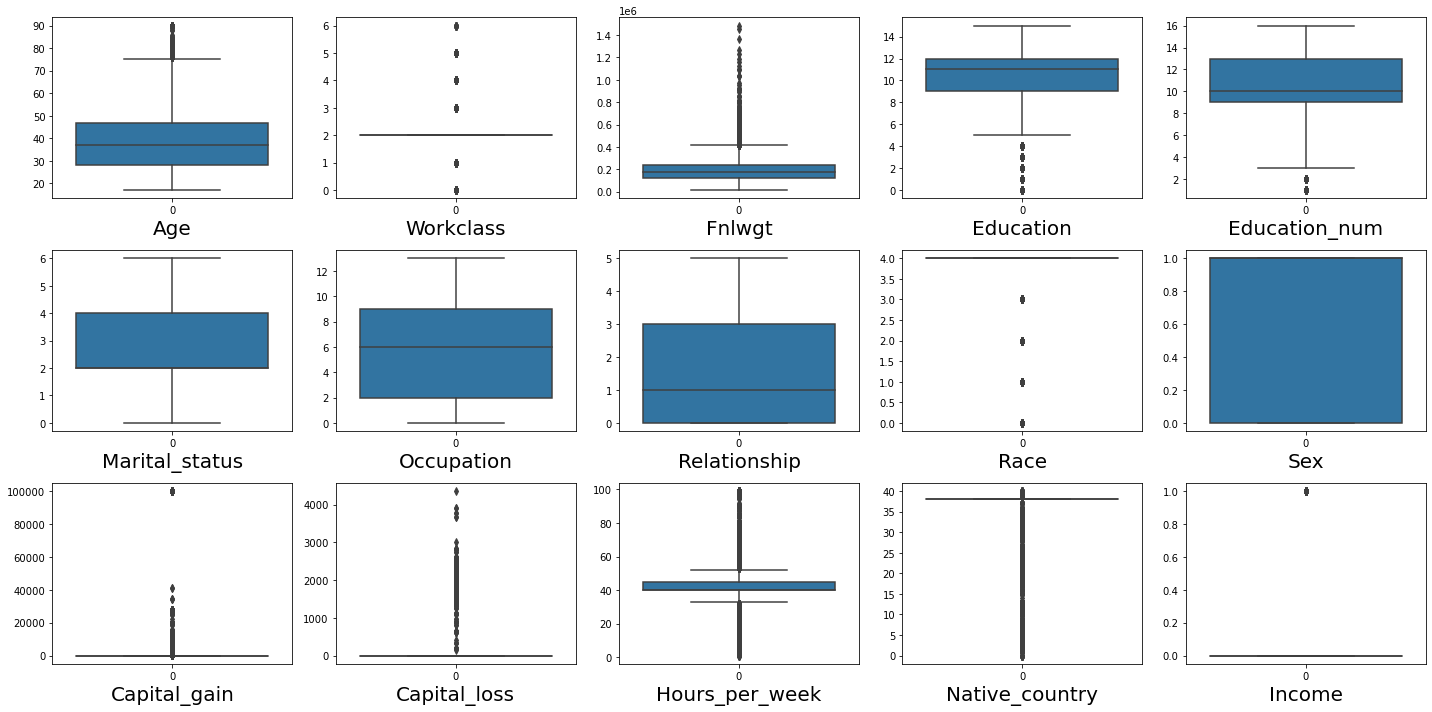

In [53]:
#Check for allien-datapoints in each features
plt.figure(figsize=(20,10))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=15:#this was made 36 just to allow for 36 spaces
        plt.subplot(3,5,graph)#6,6 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form.

# Observations on Outlier Check
From the above visualization plot its evident that majority of features posses outliers;

- Worckclass
- Fnlwgt
- Education
- Education_num
- Race
- Capital_gain
- Capital_loss
- Hours_per_week
- Native_country


However this is subject to further analysis and reconfirmation using the zscore!

# 3.8 - Skewness Check(Univariate Analysis)

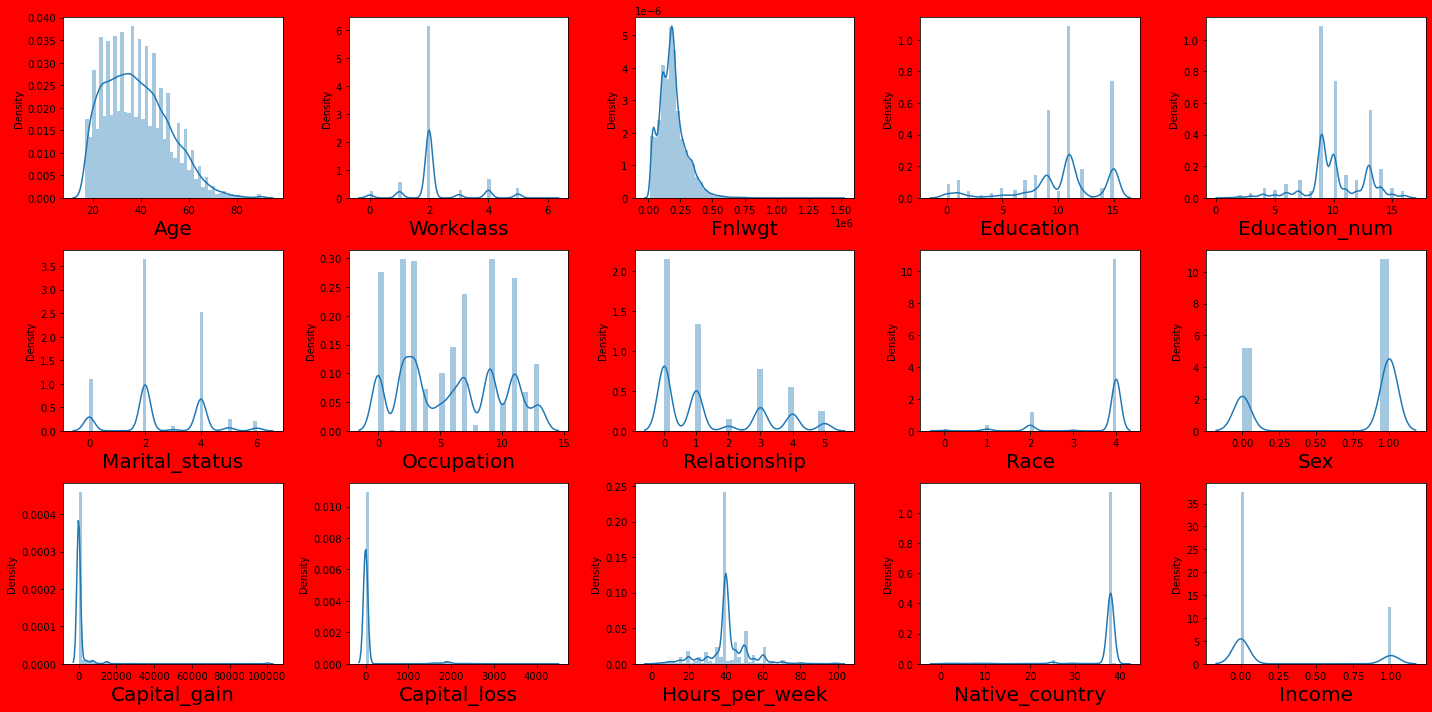

In [54]:
#Visualizing for skewness...
plt.figure(figsize=(20,10), facecolor='red')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if plotnumber<=15:#since there are 6 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 3-rows and 3-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df[column])#performing a distribution plot for all the columns starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 36
plt.tight_layout()#This is just to show you data in a compact form. 

In [55]:
#Checking for skewness in each independent variable data which has been stored in the dataframe; 'Features'
df.skew()

Age                0.530223
Workclass          1.154786
Fnlwgt             1.459212
Education         -0.944971
Education_num     -0.305328
Marital_status    -0.009387
Occupation         0.110420
Relationship       0.820275
Race              -2.506976
Sex               -0.750584
Capital_gain      11.902511
Capital_loss       4.526294
Hours_per_week     0.330856
Native_country    -4.178826
Income             1.161357
dtype: float64

# Observations on Skewness Check: 
Lets assume Skewness threshold is taken as +/-0.5.Meaning any value outside +/-0.5 contains skewness. Hence majority of the Columns are having skewness:

- Age:                0.530223

- Workclass:          1.154786

- Fnlwgt:             1.459212

- Education:         -0.944971

- Relationship:      0.820275

- Race:              -2.506976

- Sex:               -0.750584

- Capital_gain:      11.902511

- Capital_loss:       4.526294

- Native_country:    -4.178826

- Income:            1.161357

***We shall take care of these skewness using Power Transformation!

# 3.9  - Target Variable Check

0    22653
1     7508
Name: Income, dtype: int64


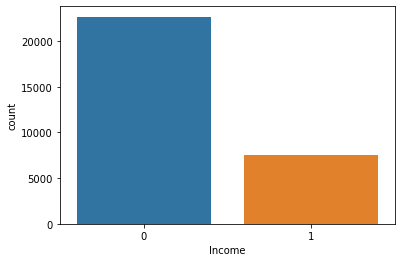

In [56]:
ax=sns.countplot(x='Income',data=df)
print(df['Income'].value_counts())

- From the above graph the dependent variable has Two classes with the majority showing Income <=50K

- Recall we mentioned an imbalanced/assymetrical distribution of the target data and will be taken care of using SMOTE

# Step 4 - DATA PREPROCESSING

# 4.1 - Removal of Duplicates

In [57]:
#Recheking shape of original data
df.shape

(30161, 15)

In [58]:
#Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(30138, 15)

 - It appears there 23 duplicates whihc has been removed!

# 4.2 - Rechecking the current Relationship btw Variables

In [59]:
#seperating the variables into X and Y variables
X=df.drop(columns=['Income'])
Y=df['Income']

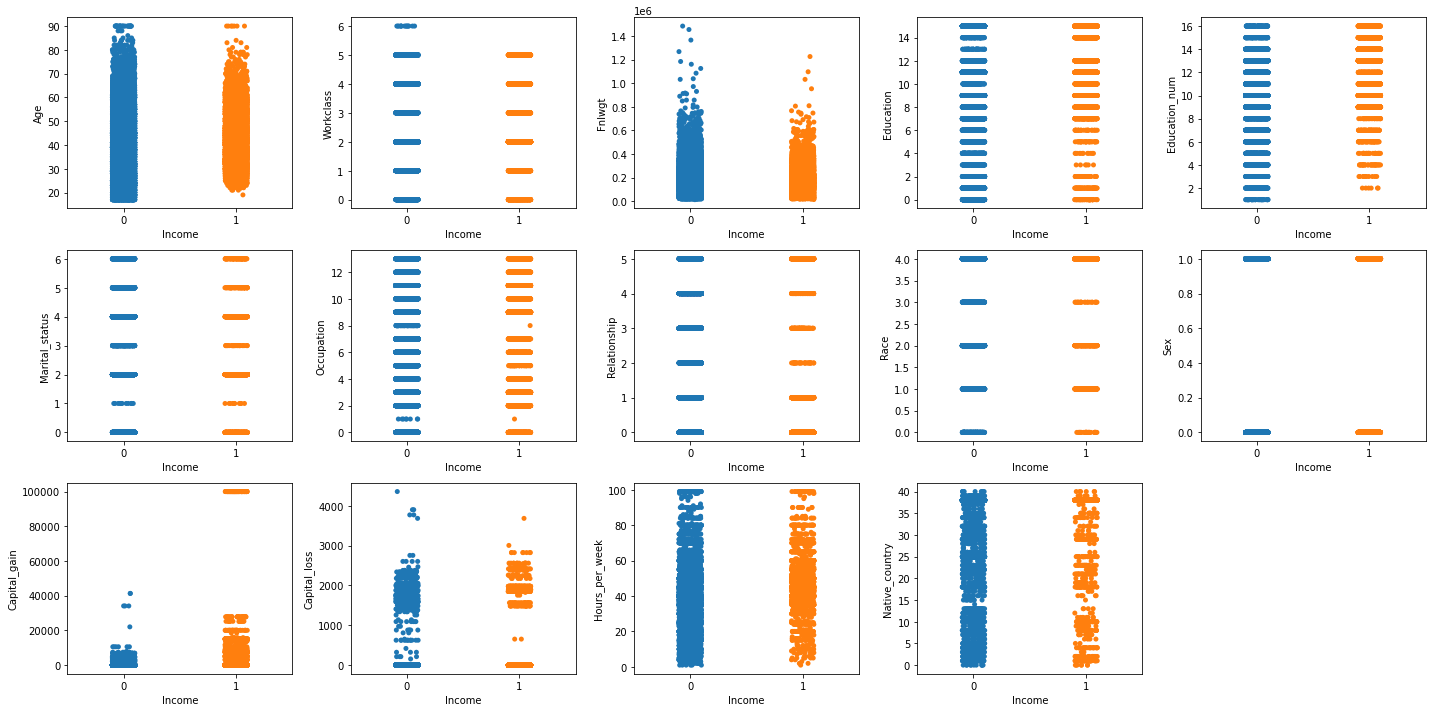

In [60]:
#Lets visualize our current data using a stripplot
plt.figure(figsize=(20,10))#dimension only
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’
for column in X:#triggering your for loop
    if plotnumber<=15:#since there are 9 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 6-rows and 6-columns spaces as seen below while plotnumber means plot graphs
        sns.stripplot(Y,X[column])#performing a strip plot
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()

From the above strip plot, you can see a relationship between the target variable and most features!

# 4.3 - Feature Selection(Dropping of Features that has no correlation with target variable and once that strongly promotes multicollinearity(VIF))

In [61]:
#Now rechecking for correlation....
df.corr()

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.080488 -0.076279  -0.001158       0.043202   
Workclass       0.080488   1.000000 -0.032314   0.017854       0.037668   
Fnlwgt         -0.076279  -0.032314  1.000000  -0.027016      -0.045161   
Education      -0.001158   0.017854 -0.027016   1.000000       0.345334   
Education_num   0.043202   0.037668 -0.045161   0.345334       1.000000   
Marital_status -0.276233  -0.034267  0.032154  -0.040668      -0.063292   
Occupation     -0.005660   0.015768 -0.000075  -0.038195       0.087763   
Relationship   -0.246482  -0.067378  0.009225  -0.012926      -0.092220   
Race            0.023857   0.044709 -0.024080   0.011338       0.033004   
Sex             0.081827   0.074883  0.025627  -0.027959       0.006023   
Capital_gain    0.080162   0.035330  0.000425   0.030618       0.124452   
Capital_loss    0.060141   0.007207 -0.009763   0.015073       0.079623   
Hours_per_week  0.101349   0.050712 -0.023037   0.060439       0.152848   
Native_country -0.002340   0.007556 -0.066495   0.078180       0.090634   
Income          0.242019   0.018088 -0.009012   0.079033       0.335444   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.276233   -0.005660     -0.246482  0.023857  0.081827   
Workclass            -0.034267    0.015768     -0.067378  0.044709  0.074883   
Fnlwgt                0.032154   -0.000075      0.009225 -0.024080  0.025627   
Education            -0.040668   -0.038195     -0.012926  0.011338 -0.027959   
Education_num        -0.063292    0.087763     -0.092220  0.033004  0.006023   
Marital_status        1.000000    0.022577      0.178045 -0.068603 -0.119897   
Occupation            0.022577    1.000000     -0.053721  0.000754  0.062567   
Relationship          0.178045   -0.053721      1.000000 -0.117113 -0.585030   
Race                 -0.068603    0.000754     -0.117113  1.000000  0.089421   
Sex                  -0.119897    0.062567     -0.585030  0.089421  1.000000   
Capital_gain         -0.042397    0.022159     -0.058284  0.014370  0.048816   
Capital_loss         -0.035148    0.014575     -0.063603  0.023548  0.047014   
Hours_per_week       -0.188889    0.018425     -0.257749  0.048550  0.231129   
Native_country       -0.025478   -0.003368     -0.010939  0.124837  0.000278   
Income               -0.193390    0.051450     -0.251033  0.071697  0.216684   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.080162      0.060141        0.101349       -0.002340   
Workclass           0.035330      0.007207        0.050712        0.007556   
Fnlwgt              0.000425     -0.009763       -0.023037       -0.066495   
Education           0.030618      0.015073        0.060439        0.078180   
Education_num       0.124452      0.079623        0.152848        0.090634   
Marital_status     -0.042397     -0.035148       -0.188889       -0.025478   
Occupation          0.022159      0.014575        0.018425       -0.003368   
Relationship       -0.058284     -0.063603       -0.257749       -0.010939   
Race                0.014370      0.023548        0.048550        0.124837   
Sex                 0.048816      0.047014        0.231129        0.000278   
Capital_gain        1.000000     -0.032254        0.080429        0.008482   
Capital_loss       -0.032254      1.000000        0.052380        0.009316   
Hours_per_week      0.080429      0.052380        1.000000        0.008628   
Native_country      0.008482      0.009316        0.008628        1.000000   
Income              0.221208      0.150023        0.229435        0.023047   

                  Income  
Age             0.242019  
Workclass       0.018088  
Fnlwgt         -0.009012  
Education       0.079033  
Education_num   0.335444  
Marital_status -0.193390  
Occupation      0.051450  
Relationship   -0.251033  
Race            0.071697  
Sex             0.21

In [62]:
#Now lets compare correlation with target variable
df.corr()['Income'].sort_values()

Relationship     -0.251033
Marital_status   -0.193390
Fnlwgt           -0.009012
Workclass         0.018088
Native_country    0.023047
Occupation        0.051450
Race              0.071697
Education         0.079033
Capital_loss      0.150023
Sex               0.216684
Capital_gain      0.221208
Hours_per_week    0.229435
Age               0.242019
Education_num     0.335444
Income            1.000000
Name: Income, dtype: float64

<AxesSubplot:>

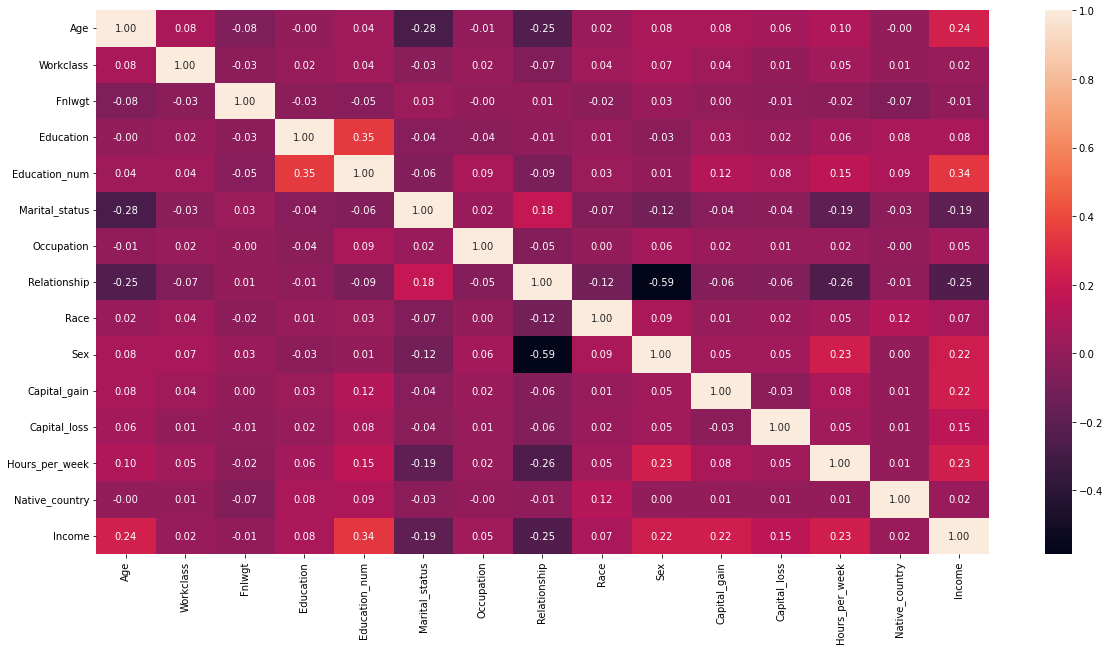

In [63]:
#Lets have a view of the heatmap again with particular focus on map-squares that are more brightened
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, linewidth=0,linecolor='black',fmt='.2f')

From the heatmap we can see no map-square(s) was/were brightened;

 
However, lets reconfirm by calculating the Variance Inflation Factor(VIF)!

# Variance Inflation Factor(VIF)

To solve this multicollinearity problem, we have to first scale our data using Standard Scaler

In [64]:
#Initializing....
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)#Recall that all features has been stored in X earlier..
X_Scaled

array([[ 0.88020135,  1.88734965, -1.00786611, ..., -0.21867715,
        -2.33202371,  0.26467102],
       [-0.03363698, -0.20890949,  0.24463439, ..., -0.21867715,
        -0.07803263,  0.26467102],
       [ 1.10866093, -0.20890949,  0.42517201, ..., -0.21867715,
        -0.07803263,  0.26467102],
       ...,
       [ 1.4894269 , -0.20890949, -0.35860264, ..., -0.21867715,
        -0.07803263,  0.26467102],
       [-1.25208809, -0.20890949,  0.11065323, ..., -0.21867715,
        -1.74765566,  0.26467102],
       [ 1.03250774,  0.83922008,  0.92874659, ..., -0.21867715,
        -0.07803263,  0.26467102]])

In [65]:
#checking the shape
X_Scaled.shape

(30138, 14)

Now we shall treat the above shape as an array of numbers(tuple) where 614 and 12 are the zeroth and first index respectively.

In [66]:
#initializing...creating an empty dataframe stored in vif
vif=pd.DataFrame()

In [67]:
#Using a list comprehension....
vif['vif']=[variance_inflation_factor(X_Scaled, i) for i in range(X_Scaled.shape[1])]#This is a list comprehension. in the for loop, the range(X_Scaled.shape[1]) which also means range(11) or (0,1,2,3,4,5,6,7,8,9,10....33), since X_Scaled.shape[1] means the first index in the X_Scaled.shape which is 12. Now all the columns in X_Scaled will now be compared with the entire X_Scaled one by one using the other part of the syntax which is variance_inflation_factor(X_Scaled, i). To shed more light, what happens here is that during th comparison using variance_inflation_factor(X_Scaled, i), the i is seen as a ‘Label’ while the X_Scaled is seen as a Feature. The output of this list comprehension is then stored in a column named 'vif' inside the empty ‘vif dataframe’ created above

In [68]:
vif['Features'] = X.columns#creating another column named 'Features' inside the empty vif Dataframe created earlier and populating it with a data called X.columns(i.e column names from the X DataFrame which was created by dropping the Label – ‘quality’ )
vif

vif        Features
0   1.158837             Age
1   1.015658       Workclass
2   1.014294          Fnlwgt
3   1.146953       Education
4   1.208419   Education_num
5   1.128002  Marital_status
6   1.018800      Occupation
7   1.675302    Relationship
8   1.034925            Race
9   1.568382             Sex
10  1.029190    Capital_gain
11  1.015635    Capital_loss
12  1.132395  Hours_per_week
13  1.030568  Native_country

From the above vif dataframe,we are setting a vif threshold of 5, meaning any feature with Variance Inflation Factor greater than 5 is assumed to have a multicollinearity problem. it is not standard. The dataset demands.

In lieu of the above assumption it mean MULTICOLLINEARITY DOES NOT EXIST!

Hence in the nut-shell, we will be dropping the below featurs as they do not impact our data set based on our Scatter Plot and  domain Knowledge ;
- Sex
- Marital_Status
- Race
- Relationship

In [69]:
#Dropping the values above
df.drop(columns=['Sex'],axis=1,inplace=True)
df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          4   83311          9             13               2   
1       38          2  215646         11              9               0   
2       53          2  234721          1              7               2   
3       28          2  338409          9             13               2   
4       37          2  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          2  257302          7             12               2   
32556   40          2  154374         11              9               2   
32557   58          2  151910         11              9               6   
32558   22          2  201490         11              9               4   
32559   52          3  287927         11              9               2   

       Occupation  Relationship  Race  Capital_gain  Capital_loss  \
0               3             0     4             0             0   
1               5             1     4             0             0   
2               5             0     2             0             0   
3               9             5     2             0             0   
4               3             5     4             0             0   
...           ...           ...   ...           ...           ...   
32555          12             5     4             0             0   
32556           6             0     4             0             0   
32557           0             4     4             0             0   
32558           0             3     4             0             0   
32559           3             5     4         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
3                  40               4       0  
4                  40              38       0  
...               ...             ...     ...  
32555              38              38       0  
32556              40              38       1  
32557              40              38       0  
32558              20              38       0  
32559              40              38       1  

[30138 rows x 14 columns]

# 4.4 - Removal of Outliers

This will be achieved using the zscore

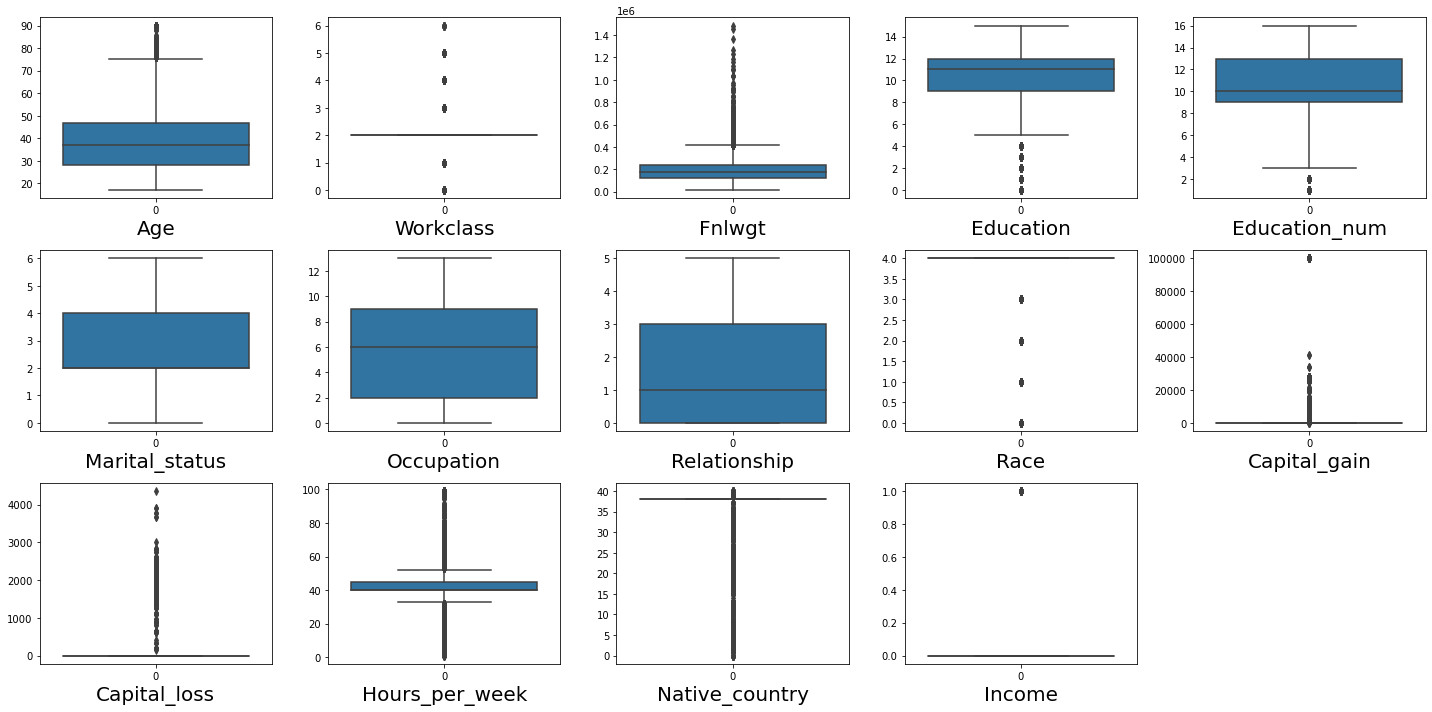

In [70]:
#Checking again for allien-datapoints in each features
plt.figure(figsize=(20,10))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=15:#this was made 27 just to allow for 27 spaces
        plt.subplot(3,5,graph)#3,5 means arrange the graphs in 3-rows and 9-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form.

In [71]:
#Get the absolute value of the zscore of the remaining dataset
np.abs(zscore(df))

Age  Workclass    Fnlwgt  Education  Education_num  \
0      0.880201   1.887350  1.007866   0.349707       1.129039   
1      0.033637   0.208909  0.244634   0.174945       0.440398   
2      1.108661   0.208909  0.425172   2.448316       1.225117   
3      0.795169   0.208909  1.406540   0.349707       1.129039   
4      0.109790   0.208909  0.897087   0.437271       1.521398   
...         ...        ...       ...        ...            ...   
32555  0.871322   0.208909  0.638893   0.874359       0.736679   
32556  0.118669   0.208909  0.335282   0.174945       0.440398   
32557  1.489427   0.208909  0.358603   0.174945       0.440398   
32558  1.252088   0.208909  0.110653   0.174945       0.440398   
32559  1.032508   0.839220  0.928747   0.174945       0.440398   

       Marital_status  Occupation  Relationship      Race  Capital_gain  \
0            0.386945    0.734634      0.885667  0.385115      0.147495   
1            1.722005    0.238346      0.261302  0.385115      0.147495   
2            0.386945    0.238346      0.885667  2.010714      0.147495   
3            0.386945    0.754229      2.236157  2.010714      0.147495   
4            0.386945    0.734634      2.236157  0.385115      0.147495   
...               ...         ...           ...       ...           ...   
32555        0.386945    1.498661      2.236157  0.385115      0.147495   
32556        0.386945    0.009798      0.885667  0.385115      0.147495   
32557        2.283175    1.479065      1.611792  0.385115      0.147495   
32558        0.948115    1.479065      0.987428  0.385115      0.147495   
32559        0.386945    0.734634      2.236157  0.385115      1.880280   

       Capital_loss  Hours_per_week  Native_country    Income  
0          0.218677        2.332024        0.264671  0.575894  
1          0.218677        0.078033        0.264671  0.575894  
2          0.218677        0.078033        0.264671  0.575894  
3          0.218677        0.078033        5.306420  0.575894  
4          0.218677        0.078033        0.264671  0.575894  
...             ...             ...             ...       ...  
32555      0.218677        0.244995        0.264671  0.575894  
32556      0.218677        0.078033        0.264671  1.736430  
32557      0.218677        0.078033        0.264671  0.575894  
32558      0.218677        1.747656        0.264671  0.575894  
32559      0.218677        0.078033        0.264671  1.736430  

[30138 rows x 14 columns]

In [72]:
#checking the data shape
z=np.abs(zscore(df))
z.shape

(30138, 14)

Now we are setting threshold of outlier zscore>3, meaning any zscore above 3 is assumed to be an Outlier. Again, its not standard. The dataset demands.

In [73]:
#index number
np.where(z>3)

(array([    3,     9,    10, ..., 30113, 30128, 30130], dtype=int64),
 array([12, 11,  8, ...,  8,  8,  8], dtype=int64))

In [74]:
#Extracting out the non-outliers(i.e zscore<3) and storing output in new object
df_new=df[(z<3).all(axis=1)]
print("Old DataFrame",df.shape)#Data still with outliers
print("New DataFrame",df_new.shape)#Data without outliers
print("total_dropped_rows",df.shape[0]-df_new.shape[0])#Take note of this arithmetic in df.shape

Old DataFrame (30138, 14)
New DataFrame (25740, 14)
total_dropped_rows 4398


A Total of 4398 outliers have been removed! Lets move on!

In [75]:
#Checking the new dataframe with non-outliers
df_new

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          4   83311          9             13               2   
1       38          2  215646         11              9               0   
2       53          2  234721          1              7               2   
4       37          2  284582         12             14               2   
5       49          2  160187          6              5               3   
...    ...        ...     ...        ...            ...             ...   
32555   27          2  257302          7             12               2   
32556   40          2  154374         11              9               2   
32557   58          2  151910         11              9               6   
32558   22          2  201490         11              9               4   
32559   52          3  287927         11              9               2   

       Occupation  Relationship  Race  Capital_gain  Capital_loss  \
0               3             0     4             0             0   
1               5             1     4             0             0   
2               5             0     2             0             0   
4               3             5     4             0             0   
5               7             1     2             0             0   
...           ...           ...   ...           ...           ...   
32555          12             5     4             0             0   
32556           6             0     4             0             0   
32557           0             4     4             0             0   
32558           0             3     4             0             0   
32559           3             5     4         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
4                  40              38       0  
5                  16              22       0  
...               ...             ...     ...  
32555              38              38       0  
32556              40              38       1  
32557              40              38       0  
32558              20              38       0  
32559              40              38       1  

[25740 rows x 14 columns]

Now we need to reset our data having removed outliers.....

In [76]:
#Lets reset our data having removed outliers
df_new.reset_index(inplace=True)
df_new

index  Age  Workclass  Fnlwgt  Education  Education_num  \
0          0   50          4   83311          9             13   
1          1   38          2  215646         11              9   
2          2   53          2  234721          1              7   
3          4   37          2  284582         12             14   
4          5   49          2  160187          6              5   
...      ...  ...        ...     ...        ...            ...   
25735  32555   27          2  257302          7             12   
25736  32556   40          2  154374         11              9   
25737  32557   58          2  151910         11              9   
25738  32558   22          2  201490         11              9   
25739  32559   52          3  287927         11              9   

       Marital_status  Occupation  Relationship  Race  Capital_gain  \
0                   2           3             0     4             0   
1                   0           5             1     4             0   
2                   2           5             0     2             0   
3                   2           3             5     4             0   
4                   3           7             1     2             0   
...               ...         ...           ...   ...           ...   
25735               2          12             5     4             0   
25736               2           6             0     4             0   
25737               6           0             4     4             0   
25738               4           0             3     4             0   
25739               2           3             5     4         15024   

       Capital_loss  Hours_per_week  Native_country  Income  
0                 0              13              38       0  
1                 0              40              38       0  
2                 0              40              38       0  
3                 0              40              38       0  
4                 0              16              22       0  
...             ...             ...             ...     ...  
25735             0              38              38       0  
25736             0              40              38       1  
25737             0              40              38       0  
25738             0              20              38       0  
25739             0              40              38       1  

[25740 rows x 15 columns]

In [77]:
#dropping the index columns which is not needed
df_new.drop('index', axis=1,inplace=True)
df_new

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          4   83311          9             13               2   
1       38          2  215646         11              9               0   
2       53          2  234721          1              7               2   
3       37          2  284582         12             14               2   
4       49          2  160187          6              5               3   
...    ...        ...     ...        ...            ...             ...   
25735   27          2  257302          7             12               2   
25736   40          2  154374         11              9               2   
25737   58          2  151910         11              9               6   
25738   22          2  201490         11              9               4   
25739   52          3  287927         11              9               2   

       Occupation  Relationship  Race  Capital_gain  Capital_loss  \
0               3             0     4             0             0   
1               5             1     4             0             0   
2               5             0     2             0             0   
3               3             5     4             0             0   
4               7             1     2             0             0   
...           ...           ...   ...           ...           ...   
25735          12             5     4             0             0   
25736           6             0     4             0             0   
25737           0             4     4             0             0   
25738           0             3     4             0             0   
25739           3             5     4         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
3                  40              38       0  
4                  16              22       0  
...               ...             ...     ...  
25735              38              38       0  
25736              40              38       1  
25737              40              38       0  
25738              20              38       0  
25739              40              38       1  

[25740 rows x 14 columns]

Now lets see how the allien-values(outliers) have been booted-out!

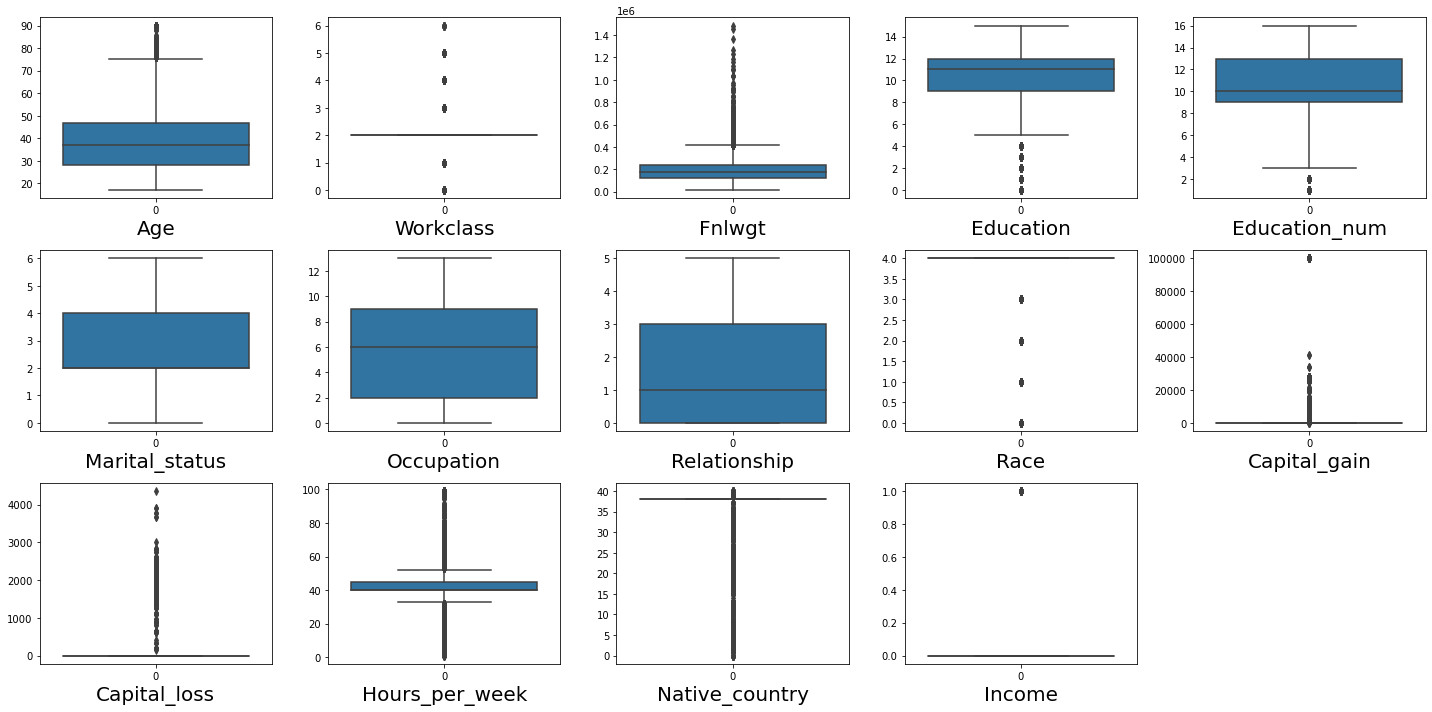

In [78]:
#rechecking again for allien-datapoints(outliers) in each features
plt.figure(figsize=(20,10))#dimension only
graph = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df:#triggering your for loop
    if graph<=15:#this was made 27 just to allow for 27 spaces
        plt.subplot(3,5,graph)#3,5 means arrange the graphs in 3-rows and 9-columns spaces as seen below while plotnumber means plot graphs
        ax=sns.boxplot(data=df[column])#performing a box plot starting with fixed acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    graph+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form.

From the above we can see that the real outliers have been removed across the features!

# 4.5 - Transforming Data to Remove Skewness using Power transformation

In [79]:
#rechecking for skewness...
df_new.skew()

Age                0.443464
Workclass          1.183344
Fnlwgt             0.628355
Education         -0.965928
Education_num     -0.134467
Marital_status    -0.039027
Occupation         0.122423
Relationship       0.787920
Race              -2.641181
Capital_gain       4.842077
Capital_loss      28.894478
Hours_per_week    -0.284041
Native_country    -5.345570
Income             1.269031
dtype: float64

Lets assume Skewness threshold is taken as +/-0.5.Meaning any value outside +/-0.5 contains skewness. Hence majority of the Columns are having skewness;


- Workclass:          1.183344

- Fnlwgt:             0.628355

- Education:         -0.965928

- Education_num:     -0.134467

- Relationship:       0.787920

- Race:              -2.641181

- Capital_gain:       4.842077

- Capital_loss:      28.894478

- Native_country:    -5.345570

- Income:             1.269031

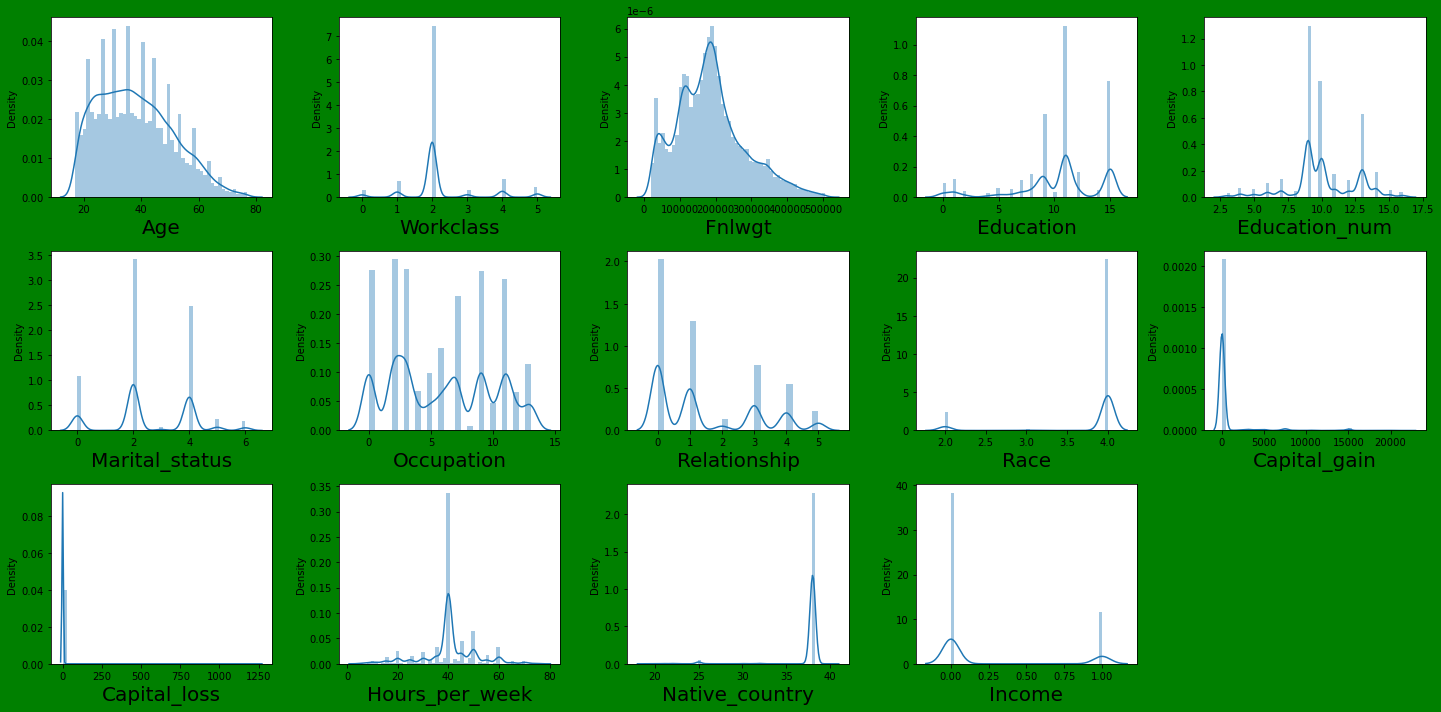

In [80]:
#Visualizing for the current skewness before Power Transformation
plt.figure(figsize=(20,10), facecolor='green')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=15:#since there are 6 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form. 

Before we apply Power Transformation lets remove all non-zero values from the features which were initially of interger datatypes(excluding the encoded independent variables)

In [81]:
#recall all the initial categorical variables were stored in features...
features

Workclass    Education       Marital_status  \
0       Self-emp-not-inc    Bachelors   Married-civ-spouse   
1                Private      HS-grad             Divorced   
2                Private         11th   Married-civ-spouse   
3                Private    Bachelors   Married-civ-spouse   
4                Private      Masters   Married-civ-spouse   
...                  ...          ...                  ...   
32555            Private   Assoc-acdm   Married-civ-spouse   
32556            Private      HS-grad   Married-civ-spouse   
32557            Private      HS-grad              Widowed   
32558            Private      HS-grad        Never-married   
32559       Self-emp-inc      HS-grad   Married-civ-spouse   

               Occupation    Relationship    Race      Sex  Native_country  \
0         Exec-managerial         Husband   White     Male   United-States   
1       Handlers-cleaners   Not-in-family   White     Male   United-States   
2       Handlers-cleaners         Husband   Black     Male   United-States   
3          Prof-specialty            Wife   Black   Female            Cuba   
4         Exec-managerial            Wife   White   Female   United-States   
...                   ...             ...     ...      ...             ...   
32555        Tech-support            Wife   White   Female   United-States   
32556   Machine-op-inspct         Husband   White     Male   United-States   
32557        Adm-clerical       Unmarried   White   Female   United-States   
32558        Adm-clerical       Own-child   White     Male   United-States   
32559     Exec-managerial            Wife   White   Female   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 9 columns]

- Here we shall use MODE for all interger type!

- Here we shall use MEAN for all floating type!

In [82]:
df_1.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

Culling-out columns that were originally of interger and data types(excluding object columns).....

In [83]:
df_new['Age']=df_new['Age'].replace(0,np.abs(df_new['Age'].mean()))
df_new['Education_num']=df_new['Education_num'].replace(0,np.abs(df_new['Education_num'].mean()))
df_new['Hours_per_week']=df_new['Hours_per_week'].replace(0,np.abs(df_new['Hours_per_week'].mean()))
df_new

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          4   83311          9             13               2   
1       38          2  215646         11              9               0   
2       53          2  234721          1              7               2   
3       37          2  284582         12             14               2   
4       49          2  160187          6              5               3   
...    ...        ...     ...        ...            ...             ...   
25735   27          2  257302          7             12               2   
25736   40          2  154374         11              9               2   
25737   58          2  151910         11              9               6   
25738   22          2  201490         11              9               4   
25739   52          3  287927         11              9               2   

       Occupation  Relationship  Race  Capital_gain  Capital_loss  \
0               3             0     4             0             0   
1               5             1     4             0             0   
2               5             0     2             0             0   
3               3             5     4             0             0   
4               7             1     2             0             0   
...           ...           ...   ...           ...           ...   
25735          12             5     4             0             0   
25736           6             0     4             0             0   
25737           0             4     4             0             0   
25738           0             3     4             0             0   
25739           3             5     4         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              38       0  
1                  40              38       0  
2                  40              38       0  
3                  40              38       0  
4                  16              22       0  
...               ...             ...     ...  
25735              38              38       0  
25736              40              38       1  
25737              40              38       0  
25738              20              38       0  
25739              40              38       1  

[25740 rows x 14 columns]

In [84]:
df_new.dtypes

Age               int64
Workclass         int32
Fnlwgt            int64
Education         int32
Education_num     int64
Marital_status    int32
Occupation        int32
Relationship      int32
Race              int32
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country    int32
Income            int32
dtype: object

Data is looking good, now lets go ahead with Power Transformation!

In [85]:
#Instantiating PowerTransformer,using 'yeo-johnson',into object 'scaler'
scaler = PowerTransformer(method ='yeo-johnson')#intstantiating using the yeo-johnson
'''
parameters:
method = 'box-cox' or 'yeo-johnson'
'''

"\nparameters:\nmethod = 'box-cox' or 'yeo-johnson'\n"

Reconfirming items that are skeweed.....

- Workclass:          1.183344

- Fnlwgt:             0.628355

- Education:         -0.965928

- Education_num:     -0.134467

- Relationship:       0.787920

- Race:              -2.641181

- Capital_gain:       4.842077

- Capital_loss:      28.894478

- Native_country:    -5.345570

- Income:             1.269031



****Target data(Loan_Status) is not considered for skewness!

In [86]:
skewed_data=df.drop(columns=['Age','Marital_status','Occupation','Hours_per_week','Income'],axis=1)
skewed_data

Workclass  Fnlwgt  Education  Education_num  Relationship  Race  \
0              4   83311          9             13             0     4   
1              2  215646         11              9             1     4   
2              2  234721          1              7             0     2   
3              2  338409          9             13             5     2   
4              2  284582         12             14             5     4   
...          ...     ...        ...            ...           ...   ...   
32555          2  257302          7             12             5     4   
32556          2  154374         11              9             0     4   
32557          2  151910         11              9             4     4   
32558          2  201490         11              9             3     4   
32559          3  287927         11              9             5     4   

       Capital_gain  Capital_loss  Native_country  
0                 0             0              38  
1                 0             0              38  
2                 0             0              38  
3                 0             0               4  
4                 0             0              38  
...             ...           ...             ...  
32555             0             0              38  
32556             0             0              38  
32557             0             0              38  
32558             0             0              38  
32559         15024             0              38  

[30138 rows x 9 columns]

In [87]:
skewed_data.columns

Index(['Workclass', 'Fnlwgt', 'Education', 'Education_num', 'Relationship',
       'Race', 'Capital_gain', 'Capital_loss', 'Native_country'],
      dtype='object')

In [88]:
#Now removing skewness by Power Transformation and updating dataset(df_new) with result
df_new[skewed_data.columns] = scaler.fit_transform(df_new[skewed_data.columns].values)

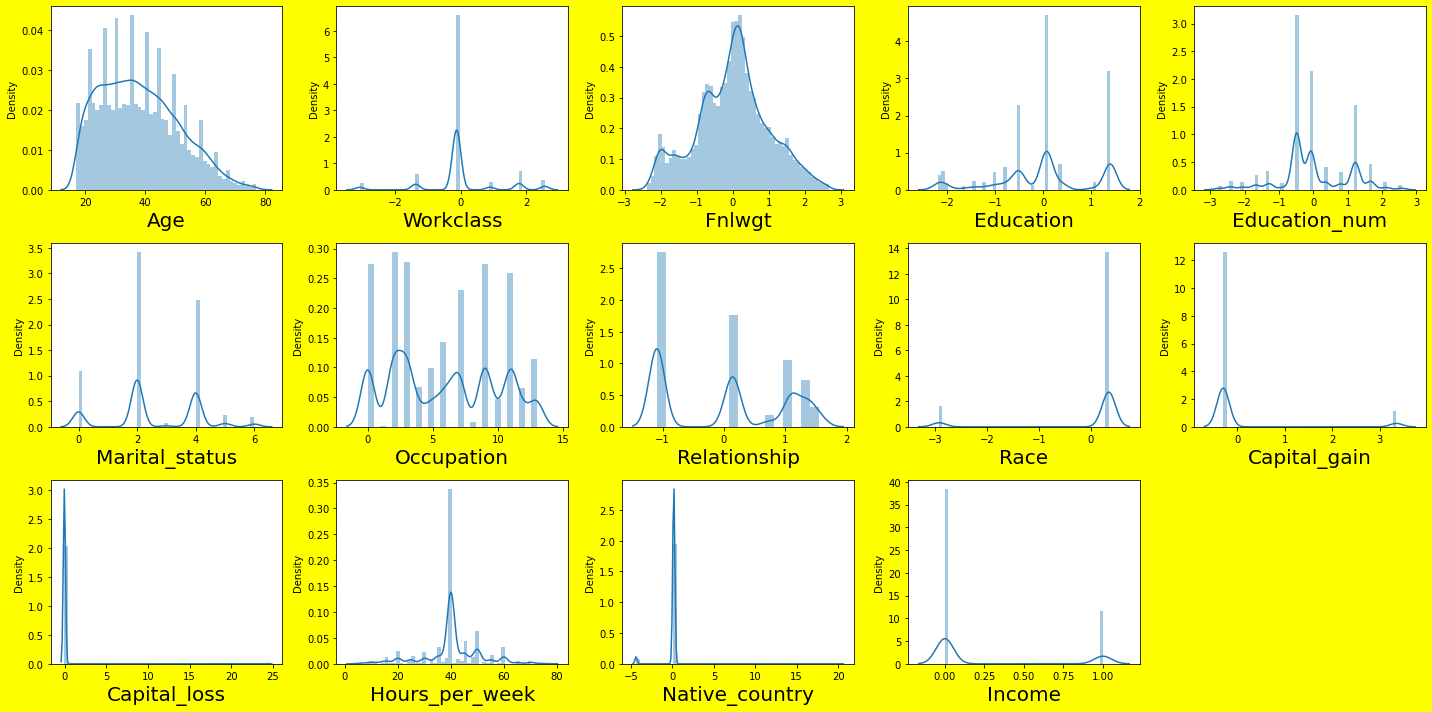

In [89]:
#Visualizing for the current skewness(if any) after Power Transformation
plt.figure(figsize=(20,10), facecolor='yellow')#dimension and line color
plotnumber = 1 #like a form of counter which we will see its relevance in the ‘for loop’

for column in df_new:#triggering your for loop
    if plotnumber<=15:#since there are 27 features
        ax = plt.subplot(3,5,plotnumber)#3,5 means arrange the graphs in 3-rows and 5-columns spaces as seen below while plotnumber means plot graphs
        sns.distplot(df_new[column])#performing a distribution plot for all the columns starting with volatile acidity
        plt.xlabel(column,fontsize=20)#labelling the x-axis with their respctive column names with a font size of 20
    plotnumber+=1#incrementals for plot number so as to allow ploting one by one until it gets to 15
plt.tight_layout()#This is just to show you data in a compact form. 

In [90]:
df_new.skew()

Age                0.443464
Workclass          0.122415
Fnlwgt            -0.034564
Education         -0.296346
Education_num      0.028006
Marital_status    -0.039027
Occupation         0.122423
Relationship       0.124560
Race              -2.583125
Capital_gain       3.048798
Capital_loss      24.406469
Hours_per_week    -0.284041
Native_country     1.642201
Income             1.269031
dtype: float64

From the above we can see that skewness has been removed for columns that were initially of continuos data type!

# 4.6 - Seperating the datasets into X and Y variables

In [91]:
#seperation
X=df_new.drop(columns=['Income'])
Y=df_new['Income']

# Transforming data into standard normal distribution

In [92]:
#transforming dataset into a standard normal distribution
scalar=StandardScaler()
X_Scaled = scalar.fit_transform(X)
X_Scaled

array([[ 9.29333326e-01,  1.78560981e+00, -1.12648600e+00, ...,
        -4.09065653e-02, -2.54563232e+00,  1.61544165e-01],
       [-2.39205590e-03, -1.22604534e-01,  4.14287471e-01, ...,
        -4.09065653e-02, -3.89964417e-02,  1.61544165e-01],
       [ 1.16226467e+00, -1.22604534e-01,  5.94644151e-01, ...,
        -4.09065653e-02, -3.89964417e-02,  1.61544165e-01],
       ...,
       [ 1.55048358e+00, -1.22604534e-01, -2.48370325e-01, ...,
        -4.09065653e-02, -3.89964417e-02,  1.61544165e-01],
       [-1.24469256e+00, -1.22604534e-01,  2.75732760e-01, ...,
        -4.09065653e-02, -1.89576376e+00,  1.61544165e-01],
       [ 1.08462089e+00,  9.02197732e-01,  1.06543107e+00, ...,
        -4.09065653e-02, -3.89964417e-02,  1.61544165e-01]])

What standard scaler does is to bring mean to zero and standard deviation to 1

In [93]:
#reconfirming that mean is 0
X_Scaled.mean()

1.2464544435215432e-17

In [94]:
#reconfirming that standard deviation is 1
X_Scaled.std()

1.0

# 4.7 - Imbalancing of Target Variable

0    19765
1     5975
Name: Income, dtype: int64


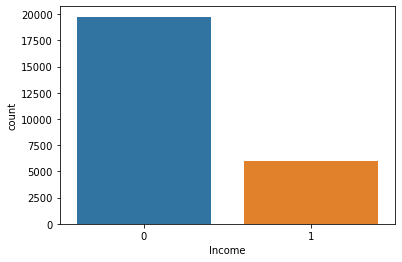

In [95]:
#Lets visualize data distribution amongst the new Binary classes
ax=sns.countplot(x='Income',data=df_new)
print(df_new['Income'].value_counts())

From the above graph we can see:

- the dependent variable has two classes with the majority being Class - 0(<=50K) and minority Class - 1(>50K)

- there is a clear case of imbalanced data and this will be resolved during futher preprocessing using sampling techniques(SMOTE)

# Step 5 - MODEL BUILDING

# 5.1 - Logistic Regression

# Best Random State

# Best Random State and Balancing Target Data(Oversampling)

In [126]:
#Using LogisticRegression to get the best Random state and apply SMOTE Oversampling technique
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    lr.fit(x_train_ns,y_train_ns)
    pred_train=lr.predict(x_train_ns)
    pred_test=lr.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  77.6 and 77.5 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  77.9 and 77.5 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  76.6 and 77.5 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  78.0 and 77.5 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random sta

The best accuracy is 79.5% at random state 192

We have found best_random state value as 192. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [96]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=192,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [97]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15825, 1: 4767})
The number of classes after fitCounter({0: 15825, 1: 13451})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4767 to 13451.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [98]:
lr=LogisticRegression()
lr.fit(x_train_ns,y_train_ns)
pred_test=lr.predict(x_test)
pred_train=lr.predict(x_train_ns)
Test_Accuracy_lr= (accuracy_score(y_test,pred_test))
Train_Accuracy_lr= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  79.64
Confusion Matrix  [[3176  764]
 [ 284  924]]
Classification Report                precision    recall  f1-score   support

           0       0.92      0.81      0.86      3940
           1       0.55      0.76      0.64      1208

    accuracy                           0.80      5148
   macro avg       0.73      0.79      0.75      5148
weighted avg       0.83      0.80      0.81      5148



LogisticRegression is producing good accuracy 80%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [99]:
#Validation accuracy
vac=cross_val_score(lr,X,Y,cv=5)
CV_Score_lr=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_lr)

[0.81837607 0.82536908 0.83119658 0.82478632 0.82264957]
Cross Validation Score is  0.8244755244755245


# Difference between Accuracy Score and Cross Validation Score

In [100]:
Test_Accuracy_lr

0.7964257964257965

In [101]:
CV_Score_lr

0.8244755244755245

In [102]:
lr_Acc_vs_CV_Score=np.abs(Test_Accuracy_lr-CV_Score_lr)
print("Difference between Accuracy and Cross Validation Score = ",lr_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.02804972804972805


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.030) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# 5.2 - KNN Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [134]:
#Using KNN Classifier to get the best Random state and apply SMOTE Oversampling technique
knn=KNeighborsClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    knn.fit(x_train_ns,y_train_ns)
    pred_train=knn.predict(x_train_ns)
    pred_test=knn.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  77.8 and 89.7 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  78.0 and 89.6 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  78.3 and 89.6 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  77.9 and 89.8 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random sta

The best accuracy is 79% at random state 63

We have found best_random state value as 63. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [103]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=63,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [104]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15767, 1: 4825})
The number of classes after fitCounter({0: 15767, 1: 13401})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4825 to 13401.

So we can now go ahead to train our model using the upgraded training data!

 # Training Model and Metrics Measurement

In [105]:
knn=KNeighborsClassifier()
knn.fit(x_train_ns,y_train_ns)
pred_test=knn.predict(x_test)
pred_train=knn.predict(x_train_ns)
Test_Accuracy_knn= (accuracy_score(y_test,pred_test))
Train_Accuracy_knn= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  78.44
Confusion Matrix  [[3179  819]
 [ 291  859]]
Classification Report                precision    recall  f1-score   support

           0       0.92      0.80      0.85      3998
           1       0.51      0.75      0.61      1150

    accuracy                           0.78      5148
   macro avg       0.71      0.77      0.73      5148
weighted avg       0.83      0.78      0.80      5148



KNeighbors is producing good accuracy 78%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [106]:
#Validation accuracy
vac=cross_val_score(knn,X,Y,cv=5)
CV_Score_knn=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_knn)

[0.80905206 0.80613831 0.80846931 0.80827506 0.81390831]
Cross Validation Score is  0.8091686091686091


# Difference between Accuracy Score and Cross Validation Score

In [107]:
Test_Accuracy_knn

0.7843822843822844

In [108]:
CV_Score_knn

0.8091686091686091

In [109]:
knn_Acc_vs_CV_Score=np.abs(Test_Accuracy_knn-CV_Score_knn)
print("Difference between Accuracy and Cross Validation Score = ",knn_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.0247863247863247


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.022) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# Step 5.3 - DecisionTree Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [143]:
#Using Decision Tree Classifier to get the best Random state and apply SMOTE Oversampling technique
dt=DecisionTreeClassifier()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    dt.fit(x_train_ns,y_train_ns)
    pred_train=dt.predict(x_train_ns)
    pred_test=dt.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  79.5 and 100.0 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  79.2 and 100.0 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  80.1 and 100.0 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  79.5 and 100.0 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random

The best accuracy is 80.9% at random state 82

We have found best_random state value as 82. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [110]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=82,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points. 

In [111]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15800, 1: 4792})
The number of classes after fitCounter({0: 15800, 1: 13430})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4792 to 13430

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [112]:
dt=DecisionTreeClassifier()
dt.fit(x_train_ns,y_train_ns)
pred_test=dt.predict(x_test)
pred_train=dt.predict(x_train_ns)
Test_Accuracy_dt= (accuracy_score(y_test,pred_test))
Train_Accuracy_dt= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  80.42
Confusion Matrix  [[3391  574]
 [ 434  749]]
Classification Report                precision    recall  f1-score   support

           0       0.89      0.86      0.87      3965
           1       0.57      0.63      0.60      1183

    accuracy                           0.80      5148
   macro avg       0.73      0.74      0.73      5148
weighted avg       0.81      0.80      0.81      5148



Decision Tree Model is producing good accuracy; 80%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [113]:
#Validation accuracy
vac=cross_val_score(dt,X,Y,cv=5)
CV_Score_dt=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_dt)

[0.8026418  0.78360528 0.8030303  0.80788656 0.79176379]
Cross Validation Score is  0.7977855477855477


# Difference between Accuracy Score and Cross Validation Score

In [114]:
Test_Accuracy_dt

0.8041958041958042

In [115]:
CV_Score_dt

0.7977855477855477

In [116]:
dt_Acc_vs_CV_Score=np.abs(Test_Accuracy_dt-CV_Score_dt)
print("Difference between Accuracy and Cross Validation Score = ",dt_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.0064102564102564985


From the above you can see that difference between Accuracy and Cross Validation score is low(0.006) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets try ensembling Techniques!

# Step 5.4 - RandomForest Classifier

# Best Random State and Balancing Data(Oversampling)

In [151]:
#Using RandomForest Classifier to get the best Random state and apply SMOTE Oversampling technique
rf=RandomForestClassifier()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    rf.fit(x_train_ns,y_train_ns)
    pred_train=rf.predict(x_train_ns)
    pred_test=rf.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  83.7 and 100.0 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  84.8 and 100.0 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  84.0 and 100.0 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  84.0 and 100.0 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random

The best accuracy is 84.9% at random state 9

We have found best_random state value as 9. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [117]:
#using the random state of 9
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=9,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [118]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15765, 1: 4827})
The number of classes after fitCounter({0: 15765, 1: 13400})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4827 to 13400.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [119]:
rf=RandomForestClassifier()
rf.fit(x_train_ns,y_train_ns)
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train_ns)
Test_Accuracy_rf= (accuracy_score(y_test,pred_test))
Train_Accuracy_rf= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  84.63
Confusion Matrix  [[3581  419]
 [ 372  776]]
Classification Report                precision    recall  f1-score   support

           0       0.91      0.90      0.90      4000
           1       0.65      0.68      0.66      1148

    accuracy                           0.85      5148
   macro avg       0.78      0.79      0.78      5148
weighted avg       0.85      0.85      0.85      5148



RandomForest Classifier is producing very good accuracy = 85%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [120]:
#Validation accuracy
vac=cross_val_score(rf,X,Y,cv=5)
CV_Score_rf=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_rf)

[0.84576535 0.84188034 0.84809635 0.8502331  0.8490676 ]
Cross Validation Score is  0.847008547008547


# Difference between Accuracy Score and Cross Validation Score

In [121]:
Test_Accuracy_rf

0.8463480963480964

In [122]:
CV_Score_rf

0.847008547008547

In [123]:
rf_Acc_vs_CV_Score=np.abs(Test_Accuracy_rf-CV_Score_rf)
print("Difference between Accuracy and Cross Validation Score = ",rf_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.0006604506604506177


From the above you can see that difference between Accuracy and Cross Validation score is very low(0.0006) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further ensemble Models!

# Step 5.5 - AdaBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [161]:
#Using AdaBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
ada=AdaBoostClassifier()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ada.fit(x_train_ns,y_train_ns)
    pred_train=ada.predict(x_train_ns)
    pred_test=ada.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  82.1 and 84.5 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  82.7 and 84.2 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  82.9 and 84.3 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  83.0 and 84.0 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random sta

The best accuracy is 84.4% at random state 89

We have found best_random state value as 89. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [124]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=89,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [125]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15774, 1: 4818})
The number of classes after fitCounter({0: 15774, 1: 13407})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4818 to 13407

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [126]:
ada=AdaBoostClassifier()
ada.fit(x_train_ns,y_train_ns)
pred_test=ada.predict(x_test)
pred_train=ada.predict(x_train_ns)
Test_Accuracy_ada= (accuracy_score(y_test,pred_test))
Train_Accuracy_ada= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  83.57
Confusion Matrix  [[3419  572]
 [ 274  883]]
Classification Report                precision    recall  f1-score   support

           0       0.93      0.86      0.89      3991
           1       0.61      0.76      0.68      1157

    accuracy                           0.84      5148
   macro avg       0.77      0.81      0.78      5148
weighted avg       0.85      0.84      0.84      5148



AdaBoostClassifier is producing good accuracy = 84%!. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [127]:
#Validation accuracy
vac=cross_val_score(ada,X,Y,cv=5)
CV_Score_ada=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ada)

[0.84887335 0.8517871  0.85819736 0.86052836 0.85644911]
Cross Validation Score is  0.855167055167055


# Difference between Accuracy Score and Cross Validation Score

In [128]:
Test_Accuracy_ada

0.8356643356643356

In [129]:
CV_Score_ada

0.855167055167055

In [130]:
ada_Acc_vs_CV_Score=np.abs(Test_Accuracy_ada-CV_Score_ada)
print("Difference between Accuracy and Cross Validation Score = ",ada_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.019502719502719423


From the above you can see that difference between Accuracy and Cross Validation score is negligible(0.019) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets build further Models!

# 5.6 - GradientBoosting Classifier

# Best Random State and Balancing Data(Oversampling)

In [169]:
#Using GradientBoosting Classifier to get the best Random state and apply SMOTE Oversampling technique
gb=GradientBoostingClassifier()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    gb.fit(x_train_ns,y_train_ns)
    pred_train=gb.predict(x_train_ns)
    pred_test=gb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  83.3 and 86.1 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  83.2 and 86.1 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  83.1 and 86.4 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  83.4 and 86.1 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random sta

The best accuracy is 84.7% at random state 89

We have found best_random state value as 89. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [131]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=89,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [132]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15774, 1: 4818})
The number of classes after fitCounter({0: 15774, 1: 13407})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4818 to 13407

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [133]:
gb=GradientBoostingClassifier()
gb.fit(x_train_ns,y_train_ns)
pred_test=gb.predict(x_test)
pred_train=gb.predict(x_train_ns)
Test_Accuracy_gb= (accuracy_score(y_test,pred_test))
Train_Accuracy_gb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  84.65
Confusion Matrix  [[3465  526]
 [ 264  893]]
Classification Report                precision    recall  f1-score   support

           0       0.93      0.87      0.90      3991
           1       0.63      0.77      0.69      1157

    accuracy                           0.85      5148
   macro avg       0.78      0.82      0.80      5148
weighted avg       0.86      0.85      0.85      5148



GradientBoosting Classifier is producing good accuracy = 85%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [134]:
#Validation accuracy
vac=cross_val_score(gb,X,Y,cv=5)
CV_Score_gb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_gb)

[0.8517871  0.85800311 0.86247086 0.86538462 0.85975136]
Cross Validation Score is  0.8594794094794095


# Difference between Accuracy Score and Cross Validation Score

In [135]:
Test_Accuracy_gb

0.8465423465423465

In [136]:
CV_Score_gb

0.8594794094794095

In [137]:
gb_Acc_vs_CV_Score=np.abs(Test_Accuracy_gb-CV_Score_gb)
print("Difference between Accuracy and Cross Validation Score = ",gb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.012937062937062982


From the above you can see that difference between Accuracy and Cross Validation score is low(0.012) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

# 5.7 - XGBoost Classifier

# Best Random State and Balancing Data(Oversampling)

In [177]:
#Using XGBoost Classifier to get the best Random state and apply SMOTE Oversampling technique
xgb=XGBClassifier()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    xgb.fit(x_train_ns,y_train_ns)
    pred_train=xgb.predict(x_train_ns)
    pred_test=xgb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  85.1 and 92.6 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  85.4 and 92.6 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  84.6 and 92.8 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  84.6 and 92.8 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random sta

The best accuracy is 86.3% at random state 54

We have found best_random state value as 54. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [138]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=54,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [139]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15787, 1: 4805})
The number of classes after fitCounter({0: 15787, 1: 13418})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4805 to 13418

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [140]:
xgb=XGBClassifier()
xgb.fit(x_train_ns,y_train_ns)
pred_test=xgb.predict(x_test)
pred_train=xgb.predict(x_train_ns)
Test_Accuracy_xgb= (accuracy_score(y_test,pred_test))
Train_Accuracy_xgb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  86.31
Confusion Matrix  [[3624  354]
 [ 351  819]]
Classification Report                precision    recall  f1-score   support

           0       0.91      0.91      0.91      3978
           1       0.70      0.70      0.70      1170

    accuracy                           0.86      5148
   macro avg       0.80      0.81      0.81      5148
weighted avg       0.86      0.86      0.86      5148



XGBoost Classifier is producing good accuracy = 86%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [141]:
#Validation accuracy
vac=cross_val_score(xgb,X,Y,cv=5)
CV_Score_xgb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_xgb)

[0.8521756  0.86091686 0.85625486 0.86674437 0.85722611]
Cross Validation Score is  0.8586635586635586


# Difference between Accuracy Score and Cross Validation Score

In [142]:
Test_Accuracy_xgb

0.8630536130536131

In [143]:
CV_Score_xgb

0.8586635586635586

In [144]:
xgb_Acc_vs_CV_Score=np.abs(Test_Accuracy_xgb-CV_Score_xgb)
print("Difference between Accuracy and Cross Validation Score = ",xgb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.004390054390054465


From the above you can see that difference between Accuracy and Cross Validation score is low(0.0043) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# 5.8 - ExtraTrees Classifier

# Best Random State and Balancing Data(Oversampling)

In [185]:
#Using ExtraTrees Classifier to get the best Random state and apply SMOTE Oversampling technique
ex=ExtraTreesClassifier()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    ex.fit(x_train_ns,y_train_ns)
    pred_train=ex.predict(x_train_ns)
    pred_test=ex.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  83.0 and 100.0 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  83.4 and 100.0 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  83.1 and 100.0 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  82.7 and 100.0 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random

The best accuracy is 84.1% at random state 89

We have found best_random state value as 89. We will now create our tain_test_splitusing this randome_state 

# Creating train_test_split....

In [145]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=89,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [146]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15774, 1: 4818})
The number of classes after fitCounter({0: 15774, 1: 13407})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4818 to 13407

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [147]:
ex=ExtraTreesClassifier()
ex.fit(x_train_ns,y_train_ns)
pred_test=ex.predict(x_test)
pred_train=ex.predict(x_train_ns)
Test_Accuracy_ex= (accuracy_score(y_test,pred_test))
Train_Accuracy_ex= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  83.92
Confusion Matrix  [[3575  416]
 [ 412  745]]
Classification Report                precision    recall  f1-score   support

           0       0.90      0.90      0.90      3991
           1       0.64      0.64      0.64      1157

    accuracy                           0.84      5148
   macro avg       0.77      0.77      0.77      5148
weighted avg       0.84      0.84      0.84      5148



ExtraTress Classifier is producing good accuracy = 84%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [148]:
#Validation of accuracy
vac=cross_val_score(ex,X,Y,cv=5)
CV_Score_ex=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_ex)

[0.83585859 0.83333333 0.83547009 0.84362859 0.83682984]
Cross Validation Score is  0.837024087024087


# Difference between Accuracy Score and Cross Validation Score

In [149]:
Test_Accuracy_ex

0.8391608391608392

In [150]:
CV_Score_ex

0.837024087024087

In [151]:
ex_Acc_vs_CV_Score=np.abs(Test_Accuracy_ex-CV_Score_ex)
print("Difference between Accuracy and Cross Validation Score = ",ex_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.002136752136752129


From the above you can see that difference between Accuracy and Cross Validation score is low(0.0021) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see more Models!

# 5.9 - Support Vector Classifier(SVC)

# Best Random State and Balancing Data(Oversampling)

In [152]:
#Using SVC to get the best Random state and apply SMOTE Oversampling technique
sv=SVC()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    sv.fit(x_train_ns,y_train_ns)
    pred_train=sv.predict(x_train_ns)
    pred_test=sv.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  78.8 and 82.8 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  78.6 and 82.4 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  78.5 and 82.8 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  79.4 and 82.9 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random sta

The best accuracy is 80.6% at random state 64

We have found best_random state value as 64. We will now create our tain_test_split using this randome_state

# Creating train_test_split....

In [153]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=64,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [154]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15800, 1: 4792})
The number of classes after fitCounter({0: 15800, 1: 13430})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4792 to 13430.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [155]:
sv=SVC()
sv.fit(x_train_ns,y_train_ns)
pred_test=sv.predict(x_test)
pred_train=sv.predict(x_train_ns)
Test_Accuracy_sv= (accuracy_score(y_test,pred_test))
Train_Accuracy_sv= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  80.11
Confusion Matrix  [[3151  814]
 [ 210  973]]
Classification Report                precision    recall  f1-score   support

           0       0.94      0.79      0.86      3965
           1       0.54      0.82      0.66      1183

    accuracy                           0.80      5148
   macro avg       0.74      0.81      0.76      5148
weighted avg       0.85      0.80      0.81      5148



Support Vector is producing good accuracy = 80%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [156]:
#Validation accuracy
vac=cross_val_score(sv,X,Y,cv=5)
CV_Score_sv=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_sv)

[0.81507382 0.80866356 0.81623932 0.80808081 0.81604507]
Cross Validation Score is  0.8128205128205128


# Difference between Accuracy Score and Cross Validation Score

In [157]:
Test_Accuracy_sv

0.8010878010878011

In [158]:
CV_Score_sv

0.8128205128205128

In [159]:
sv_Acc_vs_CV_Score=np.abs(Test_Accuracy_sv-CV_Score_sv)
print("Difference between Accuracy and Cross Validation Score = ",sv_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.011732711732711731


From the above you can see that difference between Accuracy and Cross Validation score is low(0.0117) meaning that our model is very good and not having any overfitting or underfitting problems!!

# Step 5.10 - MLP Classifier

# Best Random State and Balancing Data(Oversampling)

In [160]:
#Using MLP Classifier to get the best Random state and apply SMOTE Oversampling technique
mlp=MLPClassifier()
for i in range(0,51):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    mlp.fit(x_train_ns,y_train_ns)
    pred_train=mlp.predict(x_train_ns)
    pred_test=mlp.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  81.1 and 84.9 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  80.7 and 85.0 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  79.8 and 85.2 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  81.1 and 85.3 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random sta

The best accuracy is 81.6% at random state 36

We have found best_random state value as 36. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [161]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=36,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [162]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 85%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15798, 1: 4794})
The number of classes after fitCounter({0: 15798, 1: 13428})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4794 to 13428

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement

In [163]:
mlp=MLPClassifier()
mlp.fit(x_train_ns,y_train_ns)
pred_test=mlp.predict(x_test)
pred_train=mlp.predict(x_train_ns)
Test_Accuracy_mlp= (accuracy_score(y_test,pred_test))
Train_Accuracy_mlp= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  80.36
Confusion Matrix  [[3184  783]
 [ 228  953]]
Classification Report                precision    recall  f1-score   support

           0       0.93      0.80      0.86      3967
           1       0.55      0.81      0.65      1181

    accuracy                           0.80      5148
   macro avg       0.74      0.80      0.76      5148
weighted avg       0.85      0.80      0.81      5148



MLP Classifier is producing good accuracy = 80%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [164]:
#Validation accuracy
vac=cross_val_score(mlp,X,Y,cv=5)
CV_Score_mlp=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_mlp)

[0.83100233 0.83702409 0.84013209 0.83721834 0.84090909]
Cross Validation Score is  0.8372571872571873


# Difference between Accuracy Score and Cross Validation Score

In [165]:
Test_Accuracy_mlp

0.8036130536130536

In [166]:
CV_Score_mlp

0.8372571872571873

In [167]:
mlp_Acc_vs_CV_Score=np.abs(Test_Accuracy_mlp-CV_Score_mlp)
print("Difference between Accuracy and Cross Validation Score = ",mlp_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.03364413364413377


From the above you can see that difference between Accuracy and Cross Validation score is low(0.0336) meaning that our model is very good and not having any overfitting or underfitting problems!!

# 5.11 - GaussianNB Classifier

# Best Random State and Balancing Target Data(Oversampling)

In [169]:
#Using Gaussian Classifier to get the best Random state and apply SMOTE Oversampling technique
nb=GaussianNB()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=i,test_size=0.20)
    ove_smp=SMOTE(0.85)#increasing data by 85% using SMOTE Oversampling technique
    x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
    print("The number of classes before fit{}".format(Counter(y_train)))
    print("The number of classes before fit{}".format(Counter(y_train_ns)))
    nb.fit(x_train_ns,y_train_ns)
    pred_train=nb.predict(x_train_ns)
    pred_test=nb.predict(x_test)
    print("At random state:-",i,"Testing Accuracy and Training Accuracy are:- ",round(accuracy_score(y_test,pred_test)*100,1), "and", round(accuracy_score(y_train_ns,pred_train)*100,1), "respectively")

The number of classes before fitCounter({0: 15855, 1: 4737})
The number of classes before fitCounter({0: 15855, 1: 13476})
At random state:- 0 Testing Accuracy and Training Accuracy are:-  73.2 and 76.9 respectively
The number of classes before fitCounter({0: 15815, 1: 4777})
The number of classes before fitCounter({0: 15815, 1: 13442})
At random state:- 1 Testing Accuracy and Training Accuracy are:-  71.0 and 76.1 respectively
The number of classes before fitCounter({0: 15817, 1: 4775})
The number of classes before fitCounter({0: 15817, 1: 13444})
At random state:- 2 Testing Accuracy and Training Accuracy are:-  72.6 and 76.8 respectively
The number of classes before fitCounter({0: 15786, 1: 4806})
The number of classes before fitCounter({0: 15786, 1: 13418})
At random state:- 3 Testing Accuracy and Training Accuracy are:-  72.2 and 76.0 respectively
The number of classes before fitCounter({0: 15791, 1: 4801})
The number of classes before fitCounter({0: 15791, 1: 13422})
At random sta

The best accuracy is 76% at random state 83

We have found best_random state value as 83. We will now create our tain_test_splitusing this randome_state

# Creating train_test_split....

In [170]:
x_train,x_test,y_train,y_test=train_test_split(X_Scaled,Y,random_state=83,test_size=0.20)

# Over Sampling using SMOTE(Synthetic Minority Oversampling Technique)
This technique can be used when you have small data set.This uses the euclidean distance method and find the closest data points to the minority class and create new minority data points.

In [171]:
#applying the oversampling technique
ove_smp=SMOTE(0.85)#increasing data by 75%
x_train_ns,y_train_ns=ove_smp.fit_resample(x_train,y_train)#this will increase our original x_train and y_train data and then store it in x_train_ns and y_train_ns. Also note what we used here is 'fit.resample'(and not fit.sample) as platforms accept 'fit.resample' while others accept 'fit.sample'. So try both and pick the one that works!
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit{}".format(Counter(y_train_ns)))

The number of classes before fitCounter({0: 15837, 1: 4755})
The number of classes after fitCounter({0: 15837, 1: 13461})


From the above you can see that the 'Binary Class = 1" of the training Target variable has been upgraded by 85% i.e from 4755 to 13461.

So we can now go ahead to train our model using the upgraded training data!

# Training Model and Metrics Measurement


In [172]:
nb=GaussianNB()
nb.fit(x_train_ns,y_train_ns)
pred_test=nb.predict(x_test)
pred_train=nb.predict(x_train_ns)
Test_Accuracy_nb= (accuracy_score(y_test,pred_test))
Train_Accuracy_nb= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  74.49
Confusion Matrix  [[2807 1121]
 [ 192 1028]]
Classification Report                precision    recall  f1-score   support

           0       0.94      0.71      0.81      3928
           1       0.48      0.84      0.61      1220

    accuracy                           0.74      5148
   macro avg       0.71      0.78      0.71      5148
weighted avg       0.83      0.74      0.76      5148



GaussianNB is producing good accuracy 74%. Now we will check Cross Validation score as well for overfitting(if exists).

# Cross Validation Score

In [173]:
#Validation accuracy
vac=cross_val_score(nb,X,Y,cv=5)
CV_Score_nb=vac.mean() 
print(vac)
print("Cross Validation Score is ",CV_Score_nb)

[0.76379176 0.76864802 0.76184926 0.77039627 0.78069153]
Cross Validation Score is  0.7690753690753691


# Difference between Accuracy Score and Cross Validation Score

In [174]:
Test_Accuracy_nb

0.7449494949494949

In [175]:
CV_Score_nb

0.7690753690753691

In [176]:
nb_Acc_vs_CV_Score=np.abs(Test_Accuracy_nb-CV_Score_nb)
print("Difference between Accuracy and Cross Validation Score = ",nb_Acc_vs_CV_Score)

Difference between Accuracy and Cross Validation Score =  0.02412587412587419


From the above you can see that difference between Accuracy and Cross Validation score is neglible(0.0241) meaning that our model is very good and not having any overfitting or underfitting problems!!

We would love to improve on this Accuracy by applying the Hyperparameter Tunning, However lets see the Accuracy of other Models!

 Now that we have build 11 models in total lets compare each of them and find the best Model!

# Step 6 - COMPARING ALL TEN MACHINE LEARNING MODELS

Lets create a dataframe that will juxtapose the metrics of all the models...

In [177]:
#Constructing a dataframe...
models = pd.DataFrame({'Model' : ['Logistic Regression','KNN Classifier','DecisionTree Classifier', 'Random Forest Classifier','Ada Boosting Classifier','Gradient Boosting Classifier', 'XgBoost','Extra Trees Classifer','Support Vector Classifier','MLP Classifier','GaussianNB Classifier'],'Accuracy_Score' : [Test_Accuracy_lr,Test_Accuracy_knn,Test_Accuracy_dt,Test_Accuracy_rf,Test_Accuracy_ada,Test_Accuracy_gb,Test_Accuracy_xgb,Test_Accuracy_ex,Test_Accuracy_sv,Test_Accuracy_mlp,Test_Accuracy_nb],'Cross_Validation_Score':[CV_Score_lr,CV_Score_knn,CV_Score_dt,CV_Score_rf,CV_Score_ada,CV_Score_gb,CV_Score_xgb,CV_Score_ex,CV_Score_sv,CV_Score_mlp,CV_Score_nb],'Accuracy_VS_CVScore':[lr_Acc_vs_CV_Score,knn_Acc_vs_CV_Score,dt_Acc_vs_CV_Score,rf_Acc_vs_CV_Score,ada_Acc_vs_CV_Score,gb_Acc_vs_CV_Score,xgb_Acc_vs_CV_Score,ex_Acc_vs_CV_Score,sv_Acc_vs_CV_Score,mlp_Acc_vs_CV_Score,nb_Acc_vs_CV_Score]})
models

Model  Accuracy_Score  Cross_Validation_Score  \
0            Logistic Regression        0.796426                0.824476   
1                 KNN Classifier        0.784382                0.809169   
2        DecisionTree Classifier        0.804196                0.797786   
3       Random Forest Classifier        0.846348                0.847009   
4        Ada Boosting Classifier        0.835664                0.855167   
5   Gradient Boosting Classifier        0.846542                0.859479   
6                        XgBoost        0.863054                0.858664   
7          Extra Trees Classifer        0.839161                0.837024   
8      Support Vector Classifier        0.801088                0.812821   
9                 MLP Classifier        0.803613                0.837257   
10         GaussianNB Classifier        0.744949                0.769075   

    Accuracy_VS_CVScore  
0              0.028050  
1              0.024786  
2              0.006410  
3              0.000660  
4              0.019503  
5              0.012937  
6              0.004390  
7              0.002137  
8              0.011733  
9              0.033644  
10             0.024126

In [178]:
#Converting Accuracy and Cross_Validation_Score into Percentage....
models["Accuracy_Score"] = (models["Accuracy_Score"] * 100).round(2)
models["Cross_Validation_Score"] = (models["Cross_Validation_Score"] * 100).round(2)
models.sort_values(by = 'Accuracy_Score', ascending = False)

Model  Accuracy_Score  Cross_Validation_Score  \
6                        XgBoost           86.31                   85.87   
5   Gradient Boosting Classifier           84.65                   85.95   
3       Random Forest Classifier           84.63                   84.70   
7          Extra Trees Classifer           83.92                   83.70   
4        Ada Boosting Classifier           83.57                   85.52   
2        DecisionTree Classifier           80.42                   79.78   
9                 MLP Classifier           80.36                   83.73   
8      Support Vector Classifier           80.11                   81.28   
0            Logistic Regression           79.64                   82.45   
1                 KNN Classifier           78.44                   80.92   
10         GaussianNB Classifier           74.49                   76.91   

    Accuracy_VS_CVScore  
6              0.004390  
5              0.012937  
3              0.000660  
7              0.002137  
4              0.019503  
2              0.006410  
9              0.033644  
8              0.011733  
0              0.028050  
1              0.024786  
10             0.024126

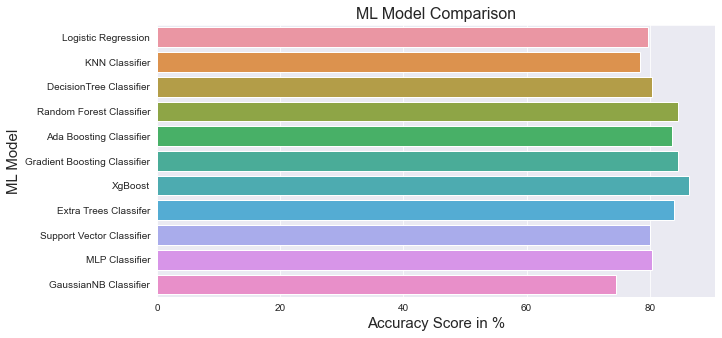

In [179]:
#Now focusing on the Accuracy Score....
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_Score', y = 'Model', data = models)

plt.xlabel('Accuracy Score in %', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('ML Model Comparison', fontsize = 16)

plt.show()

Now from the above diagram it seems that XGBoost Classifier(86.31%) has the highest Accuracy, However, our aim is to find the BEST MODEL, so if we consider the difference Between Accuracy_Score and Cross_Validation_Score....

# 6.1 - Comparing Differences between Accuracy and Cross_Validation Scores...

Lets sort by the column; Accuracy_VS_CVScore to have a good view of the differential between Accuracy_Score and CVScore

In [180]:
#Sorting....
models.sort_values(by = 'Accuracy_VS_CVScore', ascending = True)

Model  Accuracy_Score  Cross_Validation_Score  \
3       Random Forest Classifier           84.63                   84.70   
7          Extra Trees Classifer           83.92                   83.70   
6                        XgBoost           86.31                   85.87   
2        DecisionTree Classifier           80.42                   79.78   
8      Support Vector Classifier           80.11                   81.28   
5   Gradient Boosting Classifier           84.65                   85.95   
4        Ada Boosting Classifier           83.57                   85.52   
10         GaussianNB Classifier           74.49                   76.91   
1                 KNN Classifier           78.44                   80.92   
0            Logistic Regression           79.64                   82.45   
9                 MLP Classifier           80.36                   83.73   

    Accuracy_VS_CVScore  
3              0.000660  
7              0.002137  
6              0.004390  
2              0.006410  
8              0.011733  
5              0.012937  
4              0.019503  
10             0.024126  
1              0.024786  
0              0.028050  
9              0.033644

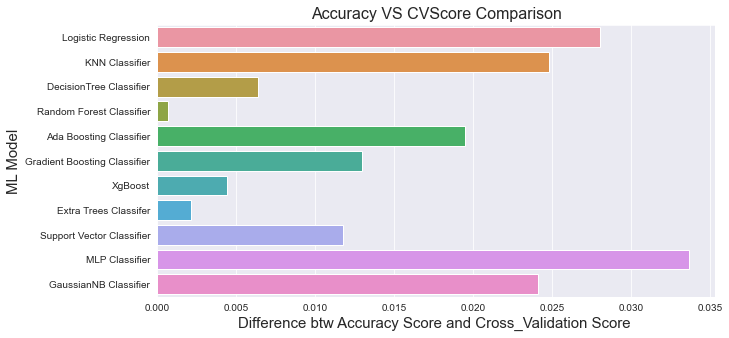

In [181]:
#Now focusing on the differnce btw Accuracy Score and Cross_Validation Scores
plt.figure(figsize = (10, 5))
sns.set_style('darkgrid')

sns.barplot(x = 'Accuracy_VS_CVScore', y = 'Model', data = models)

plt.xlabel('Difference btw Accuracy Score and Cross_Validation Score ', fontsize = 15)
plt.ylabel('ML Model', fontsize = 15)

plt.title('Accuracy VS CVScore Comparison', fontsize = 16)

plt.show()

From the above we can see the Model with least difference is RandomForest Classifier!

# 6.2 - Conclusion on Choice of Model

From the above we can see:
- The least difference is 0.000660(very neglible)!

- The Model with least difference is RandomForest Classifier!

# Hence Optimum Machine Model Chosen = RandomForest Classifier!

# Step 7 - HYPERPARAMETER TUNNING
 - Lets prepare list of parameters with options

In [182]:
#intializing...
rf=RandomForestClassifier()

In [183]:
grid_param = {'n_estimators':[13,15],'criterion' : ['gini','entropy'], 'max_depth':[10,15],'min_samples_leaf':[5,6],'min_samples_split':[10,11]}

In [184]:
grid_search=GridSearchCV(rf,param_grid=grid_param)
grid_search.fit(x_train_ns, y_train_ns)
print("Best Parameter = ",grid_search.best_params_)

Best Parameter =  {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 6, 'min_samples_split': 11, 'n_estimators': 15}


In [267]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth=43, min_samples_leaf=10, min_samples_split=15, n_estimators=300)

In [312]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth=43, min_samples_leaf=10, min_samples_split=15, n_estimators=300, max_features='log2',n_jobs=2)

In [313]:
rf.fit(x_train_ns,y_train_ns)#Training with the best parameters

RandomForestClassifier(criterion='entropy', max_depth=43, max_features='log2',
                       min_samples_leaf=10, min_samples_split=15,
                       n_estimators=300, n_jobs=2)

In [314]:
pred_test=rf.predict(x_test)
pred_train=rf.predict(x_train_ns)
Test_Accuracy_rf= (accuracy_score(y_test,pred_test))
Train_Accuracy_rf= (accuracy_score(y_train_ns,pred_train))
print("Test_Accuracy ",round(accuracy_score(y_test,pred_test)*100,2))#testing score
print("Confusion Matrix ", confusion_matrix(y_test,pred_test))
print("Classification Report ", classification_report(y_test,pred_test))

Test_Accuracy  83.68
Confusion Matrix  [[3366  562]
 [ 278  942]]
Classification Report                precision    recall  f1-score   support

           0       0.92      0.86      0.89      3928
           1       0.63      0.77      0.69      1220

    accuracy                           0.84      5148
   macro avg       0.78      0.81      0.79      5148
weighted avg       0.85      0.84      0.84      5148



# Step 8 - ROC AUC PLOT

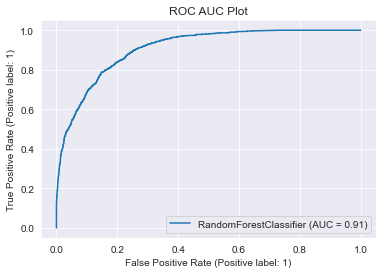

In [315]:
plot_roc_curve(rf,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

From the above we can see:
- Final Accuracy Score: 84% and AUC Score is 91% 
- That the RandomForest Classifier has an AUC close to 1(i.e 0.91)

HENCE WE CAN CONCLUDE OUR MODEL IS PRETTY GOOD!!

# Step 9 - MODEL SAVING

In [316]:
filename='Machine_Model_Project_Census_Income'
pickle.dump(rf,open(filename,'wb'))